In [ ]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import NearestCentroid

In [ ]:
PCOS_inf = pd.read_csv('/content/PCOS_infertility.csv')

In [ ]:
PCOS_inf.head()

Sl. No  Patient File No.  PCOS (Y/N)    I   beta-HCG(mIU/mL)  \
0       1             10001           0                    1.99   
1       2             10002           0                   60.80   
2       3             10003           1                  494.08   
3       4             10004           0                    1.99   
4       5             10005           0                  801.45   

   II    beta-HCG(mIU/mL) AMH(ng/mL)  
0                    1.99       2.07  
1                    1.99       1.53  
2                  494.08       6.63  
3                    1.99       1.22  
4                  801.45       2.26

In [ ]:
PCOS_woinf = pd.read_excel('/content/PCOS_data_without_infertility.xlsx', sheet_name="Full_new")

In [ ]:
PCOS_woinf.head()

Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)   \
0       1                 1           0          28         44.6        152.0   
1       2                 2           0          36         65.0        161.5   
2       3                 3           1          33         68.8        165.0   
3       4                 4           0          37         65.0        148.0   
4       5                 5           0          25         52.0        161.0   

         BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  \
0  19.300000           15                78                22  ...   
1  24.921163           15                74                20  ...   
2  25.270891           11                72                18  ...   
3  29.674945           13                72                20  ...   
4  20.060954           11                72                18  ...   

   Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
0              1.0                  0                  110   
1              0.0                  0                  120   
2              1.0                  0                  120   
3              0.0                  0                  120   
4              0.0                  0                  120   

   BP _Diastolic (mmHg)  Follicle No. (L)  Follicle No. (R)  \
0                    80                 3                 3   
1                    70                 3                 5   
2                    80                13                15   
3                    70                 2                 2   
4                    80                 3                 4   

   Avg. F size (L) (mm) Avg. F size (R) (mm)  Endometrium (mm)  Unnamed: 44  
0                  18.0                 18.0               8.5          NaN  
1                  15.0                 14.0               3.7          NaN  
2                  18.0                 20.0              10.0          NaN  
3                  15.0                 14.0               7.5          NaN  
4                  16.0                 14.0               7.0          NaN  

[5 rows x 45 columns]

In [ ]:
#Merging the two files as per patient file no.
#The files were sorted into two based on patients with infertility and without infertility
data = pd.merge(PCOS_woinf,PCOS_inf, on='Patient File No.', suffixes={'','_y'},how='left')

#Dropping the repeated features after merging
data =data.drop(['Unnamed: 44', 'Sl. No_y', 'PCOS (Y/N)_y', '  I   beta-HCG(mIU/mL)_y',
       'II    beta-HCG(mIU/mL)_y', 'AMH(ng/mL)_y'], axis=1)

data.head()

<ipython-input-6-27018d286bc1>:3: FutureWarning: Passing 'suffixes' as a <class 'set'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  data = pd.merge(PCOS_woinf,PCOS_inf, on='Patient File No.', suffixes={'','_y'},how='left')


Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)   \
0       1                 1           0          28         44.6        152.0   
1       2                 2           0          36         65.0        161.5   
2       3                 3           1          33         68.8        165.0   
3       4                 4           0          37         65.0        148.0   
4       5                 5           0          25         52.0        161.0   

         BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  \
0  19.300000           15                78                22  ...   
1  24.921163           15                74                20  ...   
2  25.270891           11                72                18  ...   
3  29.674945           13                72                20  ...   
4  20.060954           11                72                18  ...   

   Pimples(Y/N)  Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
0             0              1.0                  0                  110   
1             0              0.0                  0                  120   
2             1              1.0                  0                  120   
3             0              0.0                  0                  120   
4             0              0.0                  0                  120   

   BP _Diastolic (mmHg)  Follicle No. (L)  Follicle No. (R)  \
0                    80                 3                 3   
1                    70                 3                 5   
2                    80                13                15   
3                    70                 2                 2   
4                    80                 3                 4   

  Avg. F size (L) (mm)  Avg. F size (R) (mm)  Endometrium (mm)  
0                 18.0                  18.0               8.5  
1                 15.0                  14.0               3.7  
2                 18.0                  20.0              10.0  
3                 15.0                  14.0               7.5  
4                 16.0                  14.0               7.0  

[5 rows x 44 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [ ]:
#data with dtype objects - "AMH", "II beta-HCG"

data["AMH(ng/mL)"].head()

0    2.07
1    1.53
2    6.63
3    1.22
4    2.26
Name: AMH(ng/mL), dtype: object

In [ ]:
data["II    beta-HCG(mIU/mL)"].head()

0      1.99
1      1.99
2    494.08
3      1.99
4    801.45
Name: II    beta-HCG(mIU/mL), dtype: object

In [ ]:
data.isnull().sum()

Sl. No                    0
Patient File No.          0
PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     1
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)     

In [ ]:
#Dealing with categorical values.
#In this database the type objects are numeric values saved as strings. So I am just converting it into a numeric value.
#encountered an 'a' value in "AMH(ng/mL)" so I converted all the values to numberic and the value which cannot be converted to numeric would be replaced with NaN

data["AMH(ng/mL)"] = pd.to_numeric(data["AMH(ng/mL)"], errors='coerce')
data["II    beta-HCG(mIU/mL)"] = pd.to_numeric(data["II    beta-HCG(mIU/mL)"], errors='coerce')

In [ ]:
#Dealing with missing values in the columns - 'Marriage status' & 'Fast food'
data['Marraige Status (Yrs)'].median()

7.0

In [ ]:
data['Marraige Status (Yrs)'].mean()

7.6809259259259255

In [ ]:
#Counting the no. of 0s and 1s in the 'Fast Food' column
data['Fast food (Y/N)'].value_counts()

1.0    278
0.0    262
Name: Fast food (Y/N), dtype: int64

In [ ]:
data['Fast food (Y/N)'].mode()

0    1.0
Name: Fast food (Y/N), dtype: float64

In [ ]:
#Filling NA values with the median of that feature because there were not much difference in the 'mean' and 'median' of 'Marraige Status' column and thus for others as well
#As no. 1s in the 'Fast Food' column is more we can assume that the person with missing/NaN value eats fast food or we can just put the median value as well
data['Marraige Status (Yrs)'].fillna(data['Marraige Status (Yrs)'].median(),inplace=True)
data['II    beta-HCG(mIU/mL)'].fillna(data['II    beta-HCG(mIU/mL)'].median(),inplace=True)
data['AMH(ng/mL)'].fillna(data['AMH(ng/mL)'].median(),inplace=True)
data['Fast food (Y/N)'].fillna(data['Fast food (Y/N)'].median(),inplace=True)

#Clearing up the extra space in the column names
data.columns = [col.strip() for col in data.columns]

In [ ]:
data.isnull().sum()

Sl. No                    0
Patient File No.          0
PCOS (Y/N)                0
Age (yrs)                 0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     0
Pregnant(Y/N)             0
No. of aborptions         0
I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)     

In [ ]:
data.head()

Sl. No  Patient File No.  PCOS (Y/N)  Age (yrs)  Weight (Kg)  Height(Cm)  \
0       1                 1           0         28         44.6       152.0   
1       2                 2           0         36         65.0       161.5   
2       3                 3           1         33         68.8       165.0   
3       4                 4           0         37         65.0       148.0   
4       5                 5           0         25         52.0       161.0   

         BMI  Blood Group  Pulse rate(bpm)  RR (breaths/min)  ...  \
0  19.300000           15               78                22  ...   
1  24.921163           15               74                20  ...   
2  25.270891           11               72                18  ...   
3  29.674945           13               72                20  ...   
4  20.060954           11               72                18  ...   

   Pimples(Y/N)  Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
0             0              1.0                  0                  110   
1             0              0.0                  0                  120   
2             1              1.0                  0                  120   
3             0              0.0                  0                  120   
4             0              0.0                  0                  120   

   BP _Diastolic (mmHg)  Follicle No. (L)  Follicle No. (R)  \
0                    80                 3                 3   
1                    70                 3                 5   
2                    80                13                15   
3                    70                 2                 2   
4                    80                 3                 4   

   Avg. F size (L) (mm)  Avg. F size (R) (mm)  Endometrium (mm)  
0                  18.0                  18.0               8.5  
1                  15.0                  14.0               3.7  
2                  18.0                  20.0              10.0  
3                  15.0                  14.0               7.5  
4                  16.0                  14.0               7.0  

[5 rows x 44 columns]

In [ ]:
#statistical details
data.describe()

Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  \
count  541.000000        541.000000  541.000000  541.000000   541.000000   
mean   271.000000        271.000000    0.327172   31.430684    59.637153   
std    156.317519        156.317519    0.469615    5.411006    11.028287   
min      1.000000          1.000000    0.000000   20.000000    31.000000   
25%    136.000000        136.000000    0.000000   28.000000    52.000000   
50%    271.000000        271.000000    0.000000   31.000000    59.000000   
75%    406.000000        406.000000    1.000000   35.000000    65.000000   
max    541.000000        541.000000    1.000000   48.000000   108.000000   

       Height(Cm)         BMI  Blood Group  Pulse rate(bpm)  RR (breaths/min)  \
count  541.000000  541.000000   541.000000       541.000000        541.000000   
mean   156.484835   24.311285    13.802218        73.247689         19.243993   
std      6.033545    4.056399     1.840812         4.430285          1.688629   
min    137.000000   12.417882    11.000000        13.000000         16.000000   
25%    152.000000   21.641274    13.000000        72.000000         18.000000   
50%    156.000000   24.238227    14.000000        72.000000         18.000000   
75%    160.000000   26.634958    15.000000        74.000000         20.000000   
max    180.000000   38.900000    18.000000        82.000000         28.000000   

       ...  Pimples(Y/N)  Fast food (Y/N)  Reg.Exercise(Y/N)  \
count  ...    541.000000       541.000000         541.000000   
mean   ...      0.489834         0.515712           0.247689   
std    ...      0.500359         0.500216           0.432070   
min    ...      0.000000         0.000000           0.000000   
25%    ...      0.000000         0.000000           0.000000   
50%    ...      0.000000         1.000000           0.000000   
75%    ...      1.000000         1.000000           0.000000   
max    ...      1.000000         1.000000           1.000000   

       BP _Systolic (mmHg)  BP _Diastolic (mmHg)  Follicle No. (L)  \
count           541.000000            541.000000        541.000000   
mean            114.661738             76.927911          6.129390   
std               7.384556              5.574112          4.229294   
min              12.000000              8.000000          0.000000   
25%             110.000000             70.000000          3.000000   
50%             110.000000             80.000000          5.000000   
75%             120.000000             80.000000          9.000000   
max             140.000000            100.000000         22.000000   

       Follicle No. (R)  Avg. F size (L) (mm)  Avg. F size (R) (mm)  \
count        541.000000            541.000000            541.000000   
mean           6.641405             15.018115             15.451701   
std            4.436889              3.566839              3.318848   
min            0.000000              0.000000              0.000000   
25%            3.000000             13.000000             13.000000   
50%            6.000000             15.000000             16.000000   
75%           10.000000             18.000000             18.000000   
max           20.000000             24.000000             24.000000   

       Endometrium (mm)  
count        541.000000  
mean           8.475915  
std            2.165381  
min            0.000000  
25%            7.000000  
50%            8.500000  
75%            9.800000  
max           18.000000  

[8 rows x 44 columns]

In [ ]:
#The 'S.No.' and 'Patient File No.' columns are also irrelevant so we can drop it
data = data.drop(columns = ['Sl. No', 'Patient File No.'], axis = 1)
data.head()

PCOS (Y/N)  Age (yrs)  Weight (Kg)  Height(Cm)        BMI  Blood Group  \
0           0         28         44.6       152.0  19.300000           15   
1           0         36         65.0       161.5  24.921163           15   
2           1         33         68.8       165.0  25.270891           11   
3           0         37         65.0       148.0  29.674945           13   
4           0         25         52.0       161.0  20.060954           11   

   Pulse rate(bpm)  RR (breaths/min)  Hb(g/dl)  Cycle(R/I)  ...  Pimples(Y/N)  \
0               78                22     10.48           2  ...             0   
1               74                20     11.70           2  ...             0   
2               72                18     11.80           2  ...             1   
3               72                20     12.00           2  ...             0   
4               72                18     10.00           2  ...             0   

   Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
0              1.0                  0                  110   
1              0.0                  0                  120   
2              1.0                  0                  120   
3              0.0                  0                  120   
4              0.0                  0                  120   

   BP _Diastolic (mmHg)  Follicle No. (L)  Follicle No. (R)  \
0                    80                 3                 3   
1                    70                 3                 5   
2                    80                13                15   
3                    70                 2                 2   
4                    80                 3                 4   

   Avg. F size (L) (mm)  Avg. F size (R) (mm)  Endometrium (mm)  
0                  18.0                  18.0               8.5  
1                  15.0                  14.0               3.7  
2                  18.0                  20.0              10.0  
3                  15.0                  14.0               7.5  
4                  16.0                  14.0               7.0  

[5 rows x 42 columns]

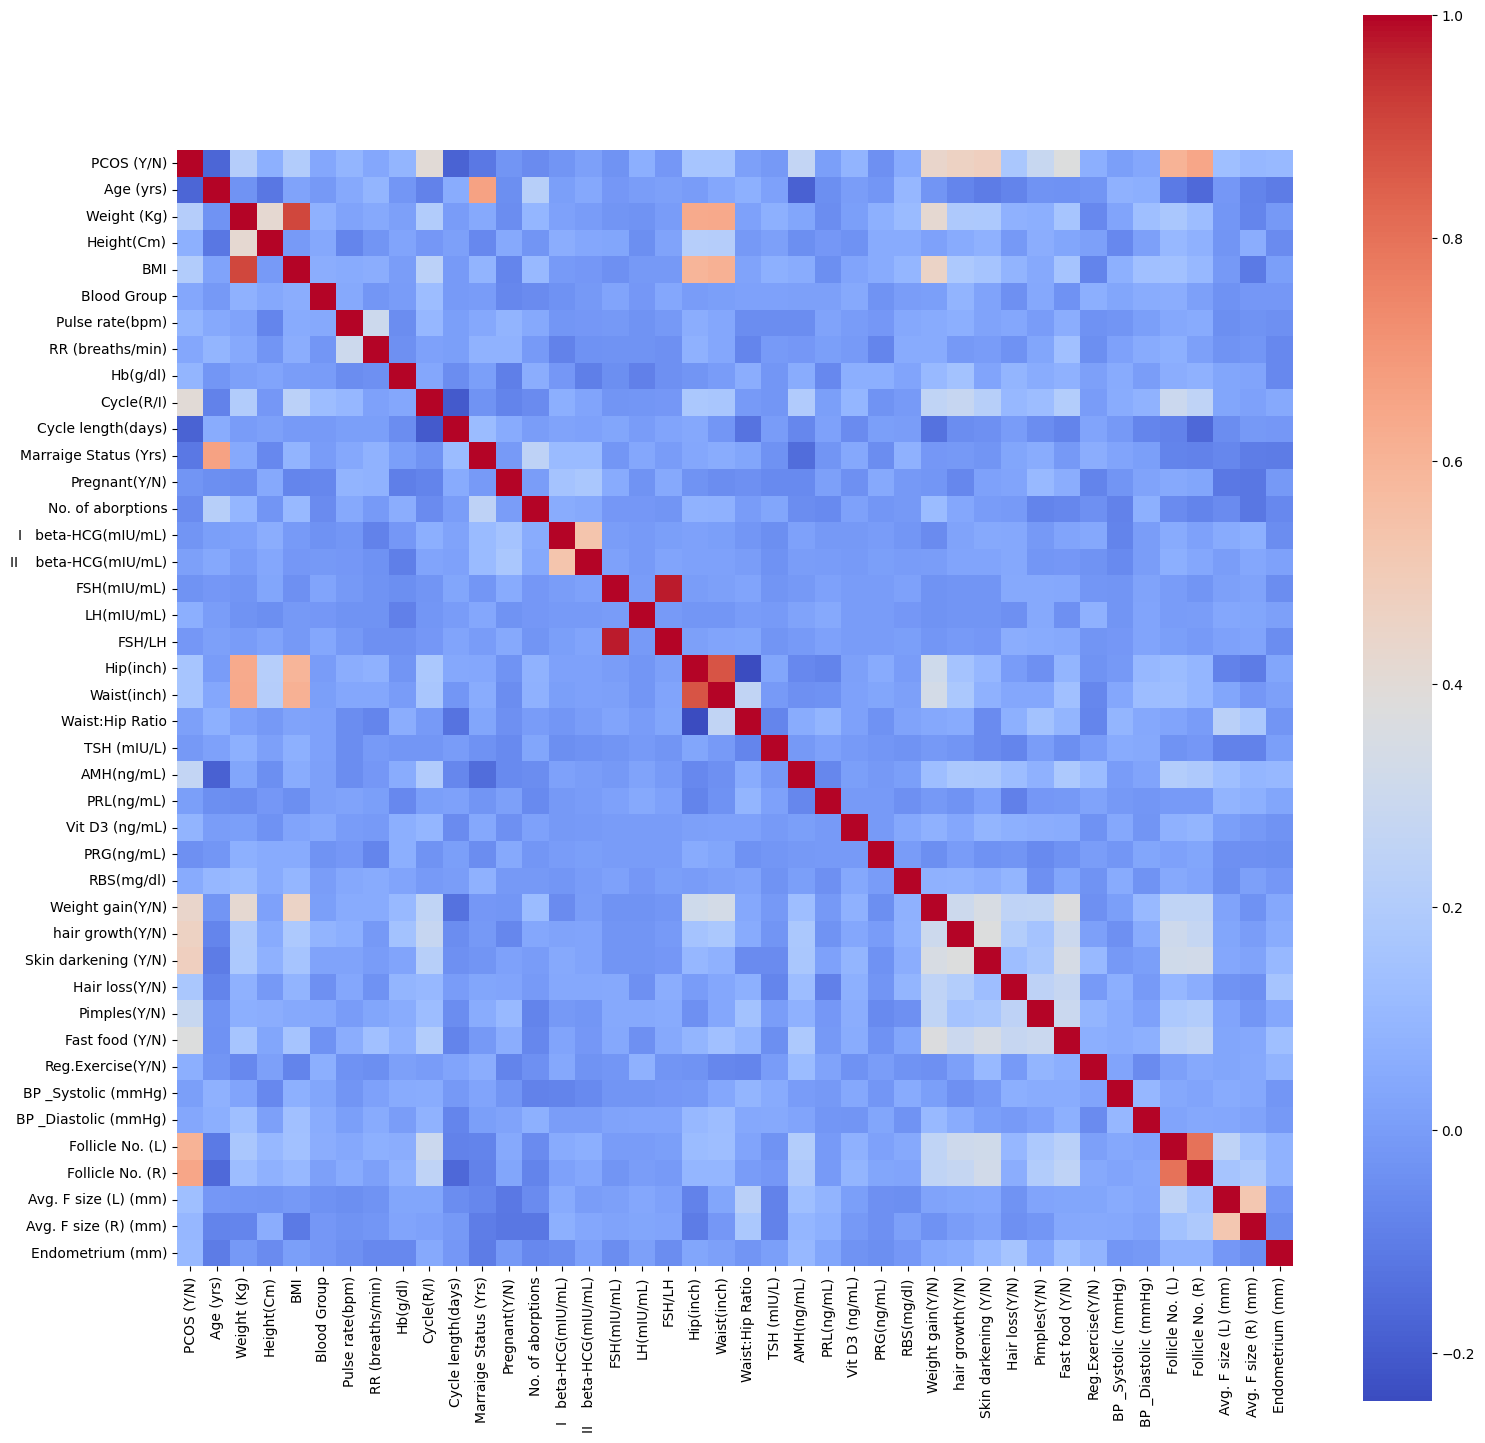

In [ ]:
#Examaning a correlation matrix of all the features
corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap="coolwarm", square=True);

In [ ]:
# Plotting correlation matrix
corr_matrix = data.corr()
corr_matrix

PCOS (Y/N)  Age (yrs)  Weight (Kg)  Height(Cm)  \
PCOS (Y/N)                1.000000  -0.168513     0.211938    0.068254   
Age (yrs)                -0.168513   1.000000    -0.029734   -0.119819   
Weight (Kg)               0.211938  -0.029734     1.000000    0.420098   
Height(Cm)                0.068254  -0.119819     0.420098    1.000000   
BMI                       0.199534   0.021261     0.901675   -0.006878   
Blood Group               0.036433  -0.010954     0.072682    0.040825   
Pulse rate(bpm)           0.091821   0.045831     0.019983   -0.074339   
RR (breaths/min)          0.036928   0.087382     0.043614   -0.029459   
Hb(g/dl)                  0.087170  -0.021558     0.009594    0.024378   
Cycle(R/I)                0.401644  -0.085943     0.200758   -0.017336   
Cycle length(days)       -0.178480   0.055918    -0.002308    0.009536   
Marraige Status (Yrs)    -0.113056   0.661407     0.043650   -0.066934   
Pregnant(Y/N)            -0.027565  -0.044165    -0.051048    0.046365   
No. of aborptions        -0.057158   0.220794     0.093540   -0.025648   
I   beta-HCG(mIU/mL)     -0.027617   0.008148     0.015994    0.062301   
II    beta-HCG(mIU/mL)    0.012760   0.043054    -0.000431    0.036657   
FSH(mIU/mL)              -0.030319  -0.017794    -0.025750    0.030941   
LH(mIU/mL)                0.063879   0.000467    -0.029864   -0.045498   
FSH/LH                   -0.018336   0.012464    -0.004844    0.022021   
Hip(inch)                 0.162297  -0.002784     0.633983    0.216173   
Waist(inch)               0.164598   0.035779     0.639635    0.209553   
Waist:Hip Ratio           0.012386   0.068413     0.014285   -0.010484   
TSH (mIU/L)              -0.010140   0.016740     0.068482    0.013504   
AMH(ng/mL)                0.264141  -0.180078     0.031244   -0.044730   
PRL(ng/mL)                0.005143  -0.048757    -0.049007   -0.016096   
Vit D3 (ng/mL)            0.085494   0.004388     0.008164   -0.034934   
PRG(ng/mL)               -0.043834  -0.021909     0.069731    0.049741   
RBS(mg/dl)                0.048922   0.097008     0.114277    0.050399   
Weight gain(Y/N)          0.441047  -0.028826     0.419333    0.018534   
hair growth(Y/N)          0.464667  -0.073434     0.188240    0.048910   
Skin darkening (Y/N)      0.475733  -0.103421     0.180186    0.074731   
Hair loss(Y/N)            0.172879  -0.082784     0.074381   -0.013533   
Pimples(Y/N)              0.286077  -0.032921     0.063983    0.061129   
Fast food (Y/N)           0.376183  -0.039108     0.160774    0.032839   
Reg.Exercise(Y/N)         0.065337  -0.025911    -0.068236    0.012943   
BP _Systolic (mmHg)       0.007942   0.073587     0.027608   -0.067959   
BP _Diastolic (mmHg)      0.038032   0.066788     0.131402    0.011116   
Follicle No. (L)          0.603346  -0.110793     0.173751    0.106189   
Follicle No. (R)          0.648327  -0.159395     0.124290    0.075358   
Avg. F size (L) (mm)      0.132992  -0.016352    -0.021368   -0.026705   
Avg. F size (R) (mm)      0.097690  -0.079250    -0.073207    0.059426   
Endometrium (mm)          0.106648  -0.104238    -0.010100   -0.054035   

                             BMI  Blood Group  Pulse rate(bpm)  \
PCOS (Y/N)              0.199534     0.036433         0.091821   
Age (yrs)               0.021261    -0.010954         0.045831   
Weight (Kg)             0.901675     0.072682         0.019983   
Height(Cm)             -0.006878     0.040825        -0.074339   
BMI                     1.000000     0.061939         0.050529   
Blood Group             0.061939     1.000000         0.047572   
Pulse rate(bpm)         0.050529     0.047572         1.000000   
RR (breaths/min)        0.061905    -0.023766         0.303804   
Hb(g/dl)                0.003512    -0.001759        -0.052048   
Cycle(R/I)              0.232828     0.123724         0.101006   
Cycle length(days)     -0.006232    -0.006290         0.006423   
Marraige Status (Yrs)   0.083944    -0.001965    

In [ ]:
#features correlate with the PCOS
corrmat["PCOS (Y/N)"].sort_values(ascending=False)

PCOS (Y/N)                1.000000
Follicle No. (R)          0.648327
Follicle No. (L)          0.603346
Skin darkening (Y/N)      0.475733
hair growth(Y/N)          0.464667
Weight gain(Y/N)          0.441047
Cycle(R/I)                0.401644
Fast food (Y/N)           0.376183
Pimples(Y/N)              0.286077
AMH(ng/mL)                0.264141
Weight (Kg)               0.211938
BMI                       0.199534
Hair loss(Y/N)            0.172879
Waist(inch)               0.164598
Hip(inch)                 0.162297
Avg. F size (L) (mm)      0.132992
Endometrium (mm)          0.106648
Avg. F size (R) (mm)      0.097690
Pulse rate(bpm)           0.091821
Hb(g/dl)                  0.087170
Vit D3 (ng/mL)            0.085494
Height(Cm)                0.068254
Reg.Exercise(Y/N)         0.065337
LH(mIU/mL)                0.063879
RBS(mg/dl)                0.048922
BP _Diastolic (mmHg)      0.038032
RR (breaths/min)          0.036928
Blood Group               0.036433
II    beta-HCG(mIU/m

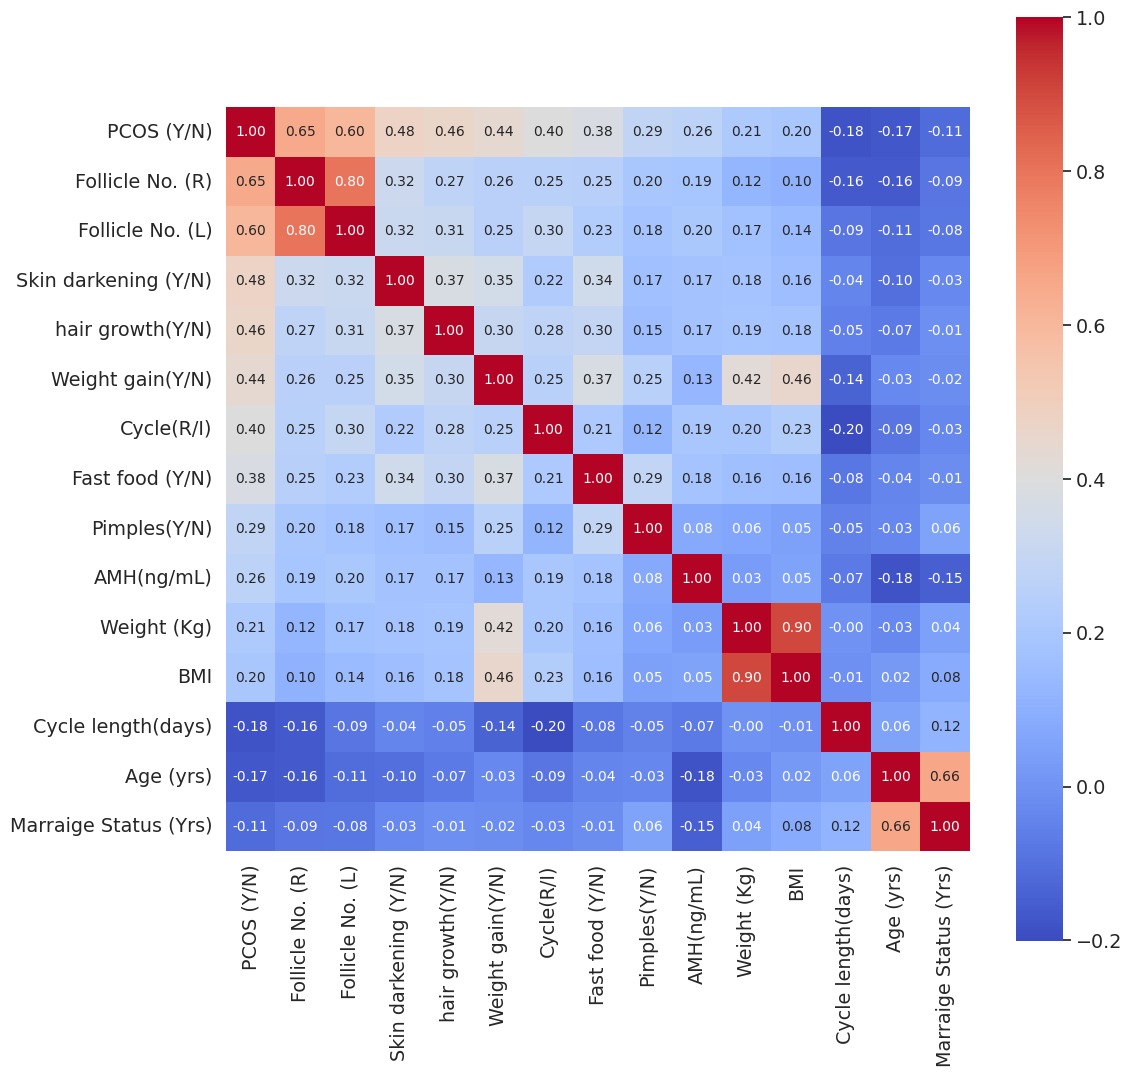

In [ ]:
# Setting the figure size
plt.figure(figsize=(12, 12))

# Number of variables with positive correlation to display in the heatmap
k = 12

# Number of variables with negative correlation to display in the heatmap
l = 3

# Selecting the top k variables with the highest (+ve) correlation, l variables with lowest correlation (-ve)
cols_p = corrmat.nlargest(k, "PCOS (Y/N)")["PCOS (Y/N)"].index
cols_n = corrmat.nsmallest(l, "PCOS (Y/N)")["PCOS (Y/N)"].index

# Combine the selected columns for the heatmap
cols = cols_p.append(cols_n)

# Calculating the correlation matrix for the selected columns
cm = np.corrcoef(data[cols].values.T)

sns.set(font_scale=1.25)

hm = sns.heatmap(cm, cbar=True, cmap="coolwarm", annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

plt.show()


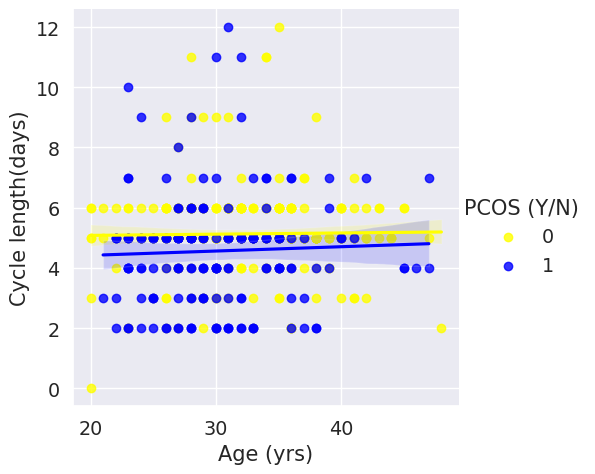

In [ ]:
# Length of menstrual phase in PCOS vs normal
color = ["yellow", "blue"]
fig=sns.lmplot(data=data,x="Age (yrs)",y="Cycle length(days)", hue="PCOS (Y/N)",palette=color)
plt.show(fig)

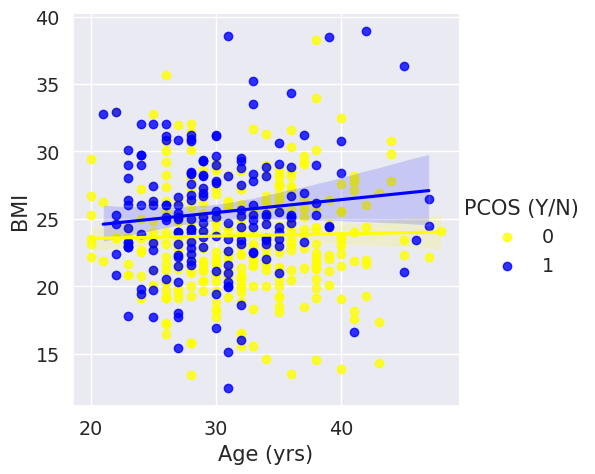

In [ ]:
# Pattern of weight gain (BMI) over years in PCOS and Normal.
fig= sns.lmplot(data =data,x="Age (yrs)",y="BMI", hue="PCOS (Y/N)", palette= color )
plt.show(fig)

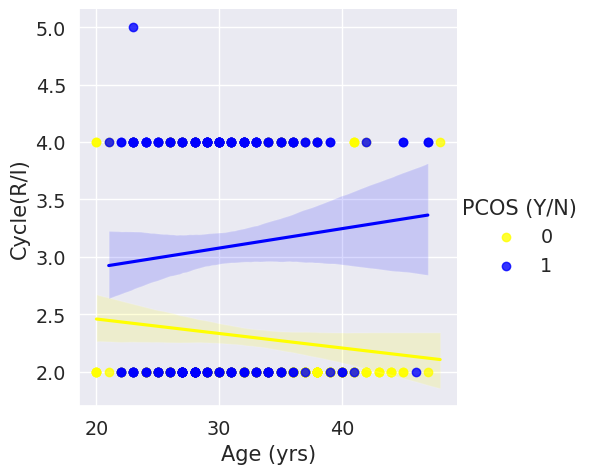

In [ ]:
# cycle IR wrt age
sns.lmplot(data =data,x="Age (yrs)",y="Cycle(R/I)", hue="PCOS (Y/N)",palette=color)
plt.show()

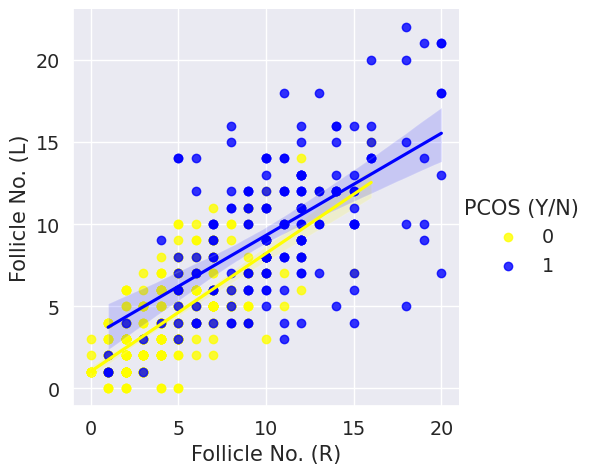

In [ ]:
# Distribution of follicles in both ovaries.
sns.lmplot(data =data,x='Follicle No. (R)',y='Follicle No. (L)', hue="PCOS (Y/N)",palette=color)
plt.show()

<ipython-input-29-7abf845109c2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i], palette=color)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 32.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


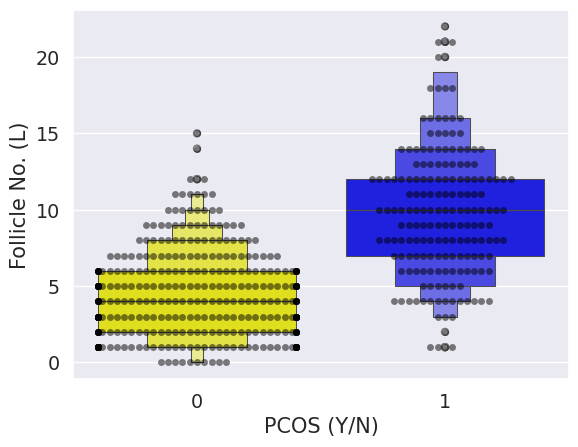

<ipython-input-29-7abf845109c2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i], palette=color)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 30.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


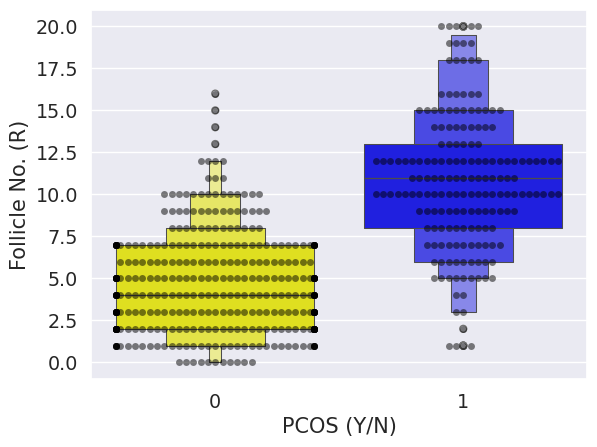

In [ ]:
features = ["Follicle No. (L)","Follicle No. (R)"]
for i in features:
    sns.swarmplot(x=data["PCOS (Y/N)"], y=data[i], color="black", alpha=0.5 )
    sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i], palette=color)
    plt.show()

<ipython-input-30-484e90987139>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i], palette=color)


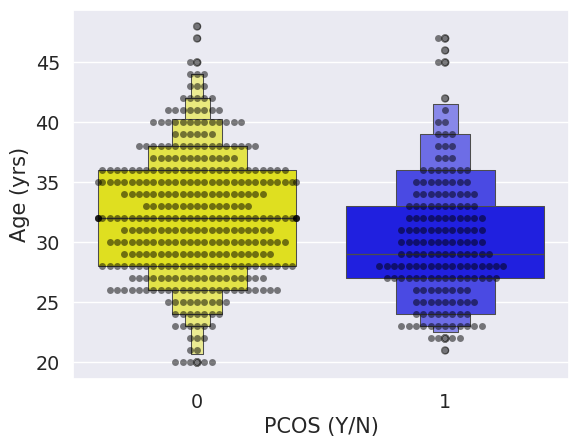

<ipython-input-30-484e90987139>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i], palette=color)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


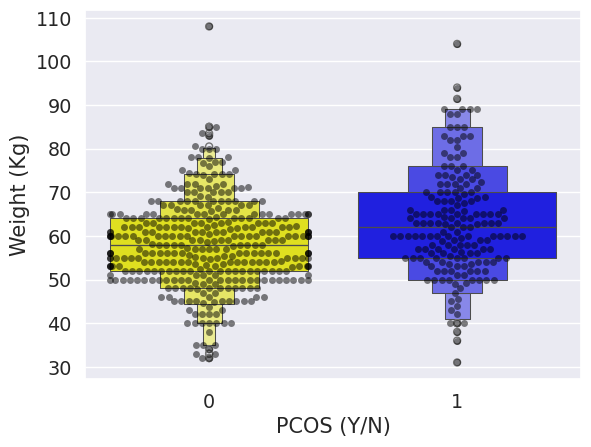

<ipython-input-30-484e90987139>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i], palette=color)


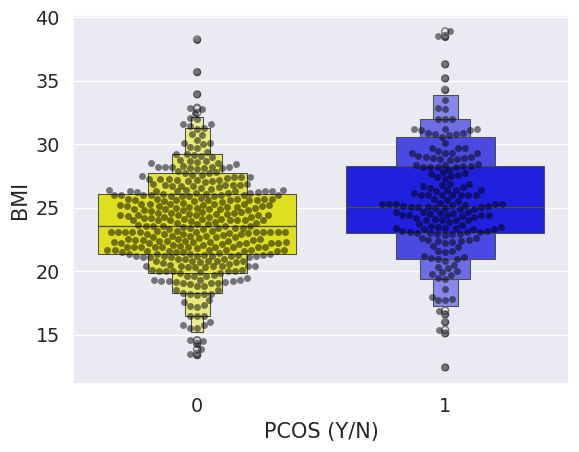

<ipython-input-30-484e90987139>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i], palette=color)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 21.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


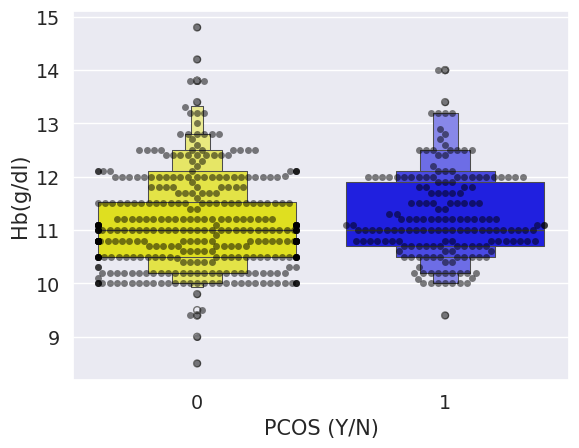

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 53.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 7.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-30-484e90987139>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i], palette=color)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 65.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categori

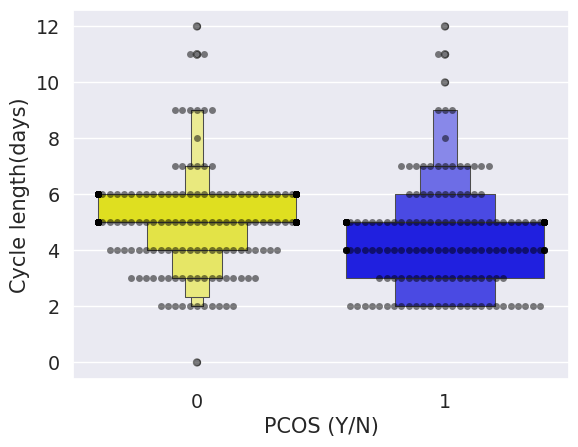

<ipython-input-30-484e90987139>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i], palette=color)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 12.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


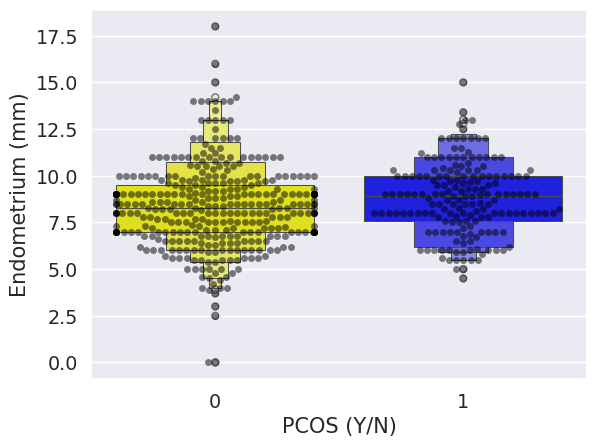

In [ ]:
features = ["Age (yrs)","Weight (Kg)", "BMI", "Hb(g/dl)", "Cycle length(days)","Endometrium (mm)" ]
for i in features:
    sns.swarmplot(x=data["PCOS (Y/N)"], y=data[i], color="black", alpha=0.5 )
    sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i], palette=color)
    plt.show()

In [ ]:
#Assigning the features (X) and target(y)
X=data.drop(["PCOS (Y/N)"],axis = 1)
y=data["PCOS (Y/N)"]

#Splitting the data into test and training sets
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
#Checking the shape of train and test data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(432, 41)
(432,)
(109, 41)
(109,)


In [ ]:
#Fitting the RandomForestClassifier to the training set
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

#Making prediction and checking the test set
pred_rfc = rfc.predict(X_test)
accuracy = accuracy_score(y_test, pred_rfc)
print(accuracy)

0.8807339449541285


In [ ]:
#Building a dictionary with list of optional values that will me analyesed by RandomisedSearch CV
parameters = {
    'n_estimators': randint(100, 1000),  # Random integers between 100 and 1000
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': randint(4, 13),  # Random integers between 4 and 12
    'criterion': ['gini', 'entropy'],
    'n_jobs': [-1, 1, None]
}

#Fitting the training set to find parameters with best accuracy
random_search = RandomizedSearchCV(estimator=rfc, param_distributions=parameters, n_iter=15, cv=7, random_state=42)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best Parameters: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 746, 'n_jobs': -1}
Best Score: 0.9096849739366927


In [ ]:
#Fitting the model with selected parameters
rfc1=RandomForestClassifier(**random_search.best_params_)
rfc1.fit(X_train, y_train)

#Testing the Model on test set
predictions=rfc1.predict(X_test)
acccuracy_final = accuracy_score(y_test,predictions)

acccuracy_final

0.8623853211009175

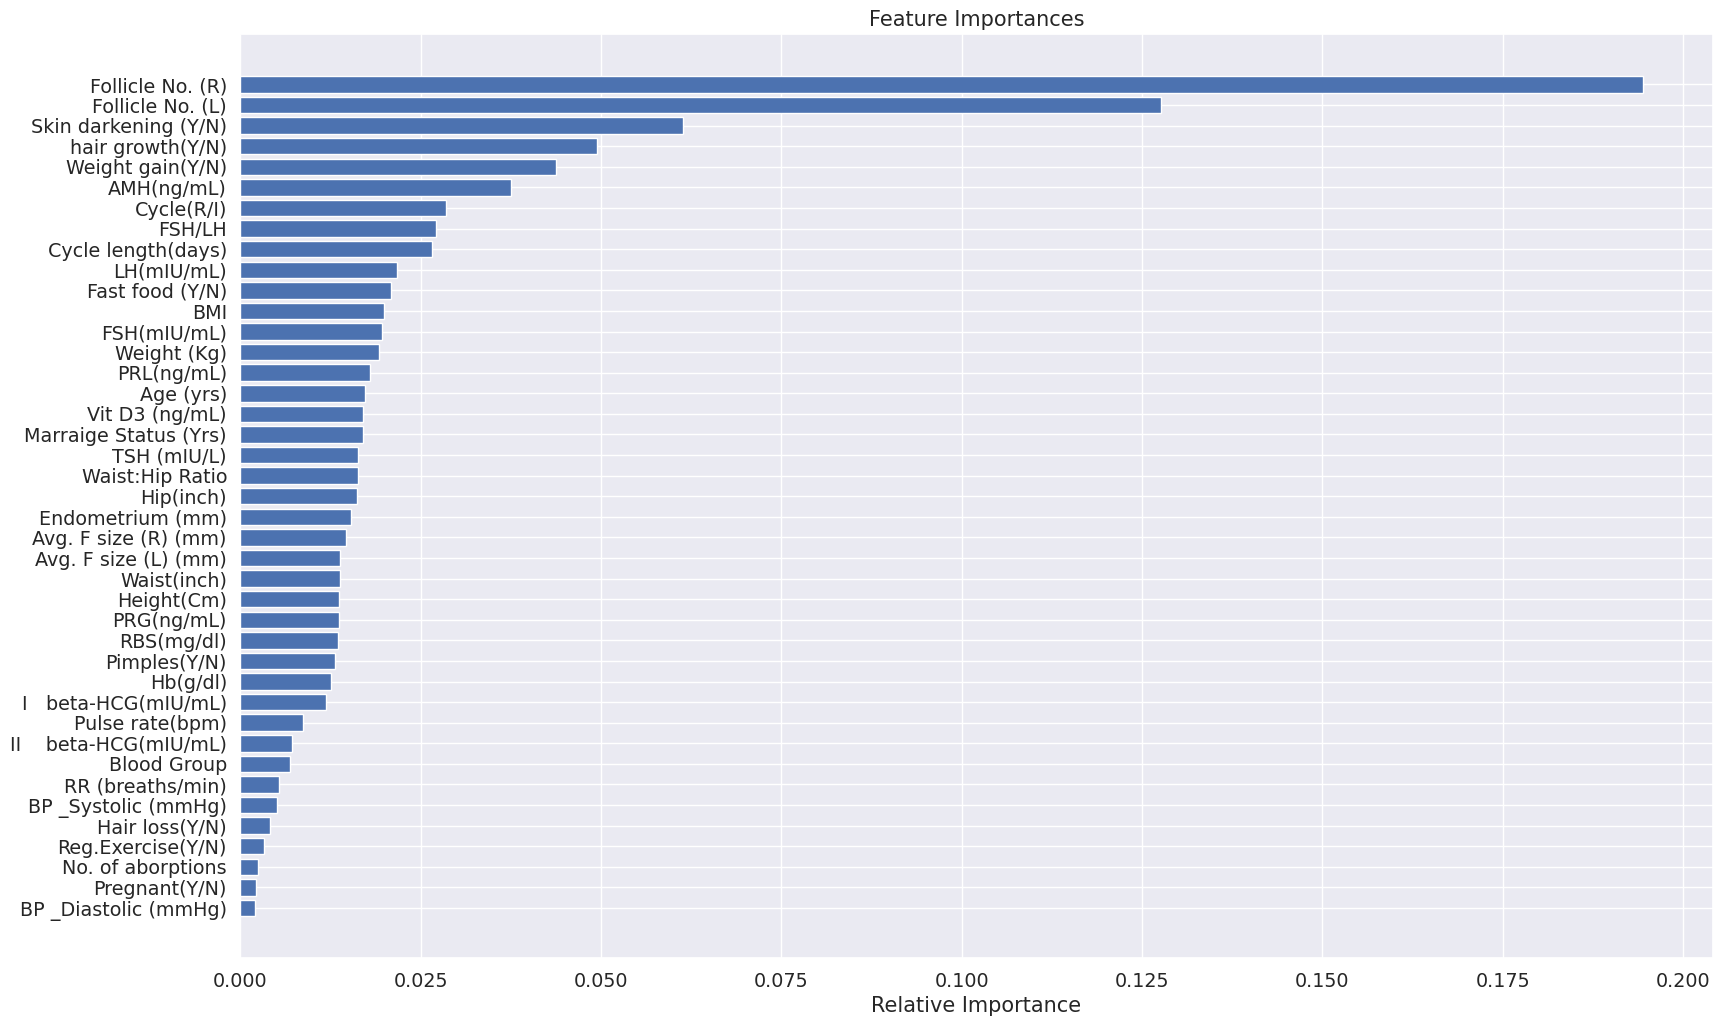

In [ ]:
# Plot Feature importance graph(horizontal Bar graph)
features = X_test.columns
importances = rfc1.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize = (19, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.grid(True)
plt.show()

In [ ]:
# Try ccp (Cost Complexity Pruning)
param_grid = {
    "max_depth":[8, 10, 12, 14, 15, 16, 17],
    "n_estimators":[100,150,200,300,400,500,600]
}

gridsearch_rf = GridSearchCV(
                        RandomForestClassifier(random_state = 0),
                         param_grid,
                         cv = 5,
                         n_jobs = -1)
gridsearch_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [8, 10, 12, 14, 15, 16, 17],
                         'n_estimators': [100, 150, 200, 300, 400, 500, 600]})

In [ ]:
# A funtion to print the gridsearch result
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [ ]:
# Print the result
print_results(gridsearch_rf)

BEST PARAMS: {'max_depth': 14, 'n_estimators': 200}

0.898 (+/-0.048) for {'max_depth': 8, 'n_estimators': 100}
0.91 (+/-0.054) for {'max_depth': 8, 'n_estimators': 150}
0.912 (+/-0.058) for {'max_depth': 8, 'n_estimators': 200}
0.912 (+/-0.048) for {'max_depth': 8, 'n_estimators': 300}
0.912 (+/-0.052) for {'max_depth': 8, 'n_estimators': 400}
0.907 (+/-0.059) for {'max_depth': 8, 'n_estimators': 500}
0.905 (+/-0.054) for {'max_depth': 8, 'n_estimators': 600}
0.903 (+/-0.058) for {'max_depth': 10, 'n_estimators': 100}
0.907 (+/-0.063) for {'max_depth': 10, 'n_estimators': 150}
0.912 (+/-0.054) for {'max_depth': 10, 'n_estimators': 200}
0.91 (+/-0.058) for {'max_depth': 10, 'n_estimators': 300}
0.905 (+/-0.038) for {'max_depth': 10, 'n_estimators': 400}
0.9 (+/-0.041) for {'max_depth': 10, 'n_estimators': 500}
0.905 (+/-0.048) for {'max_depth': 10, 'n_estimators': 600}
0.9 (+/-0.073) for {'max_depth': 12, 'n_estimators': 100}
0.9 (+/-0.073) for {'max_depth': 12, 'n_estimators': 150}
0.

In [ ]:
print('CCP Score:', gridsearch_rf.best_score_)
print('CCP Parameters:', gridsearch_rf.best_params_)

CCP Score: 0.9143009890403635
CCP Parameters: {'max_depth': 14, 'n_estimators': 200}


In [ ]:
# Take the best estimator
bestCtree_rf = gridsearch_rf.best_estimator_

# Predict and print accuracy score
pred_rf = bestCtree_rf.predict(X_test)
print(accuracy_score(y_test, pred_rf))

0.8532110091743119


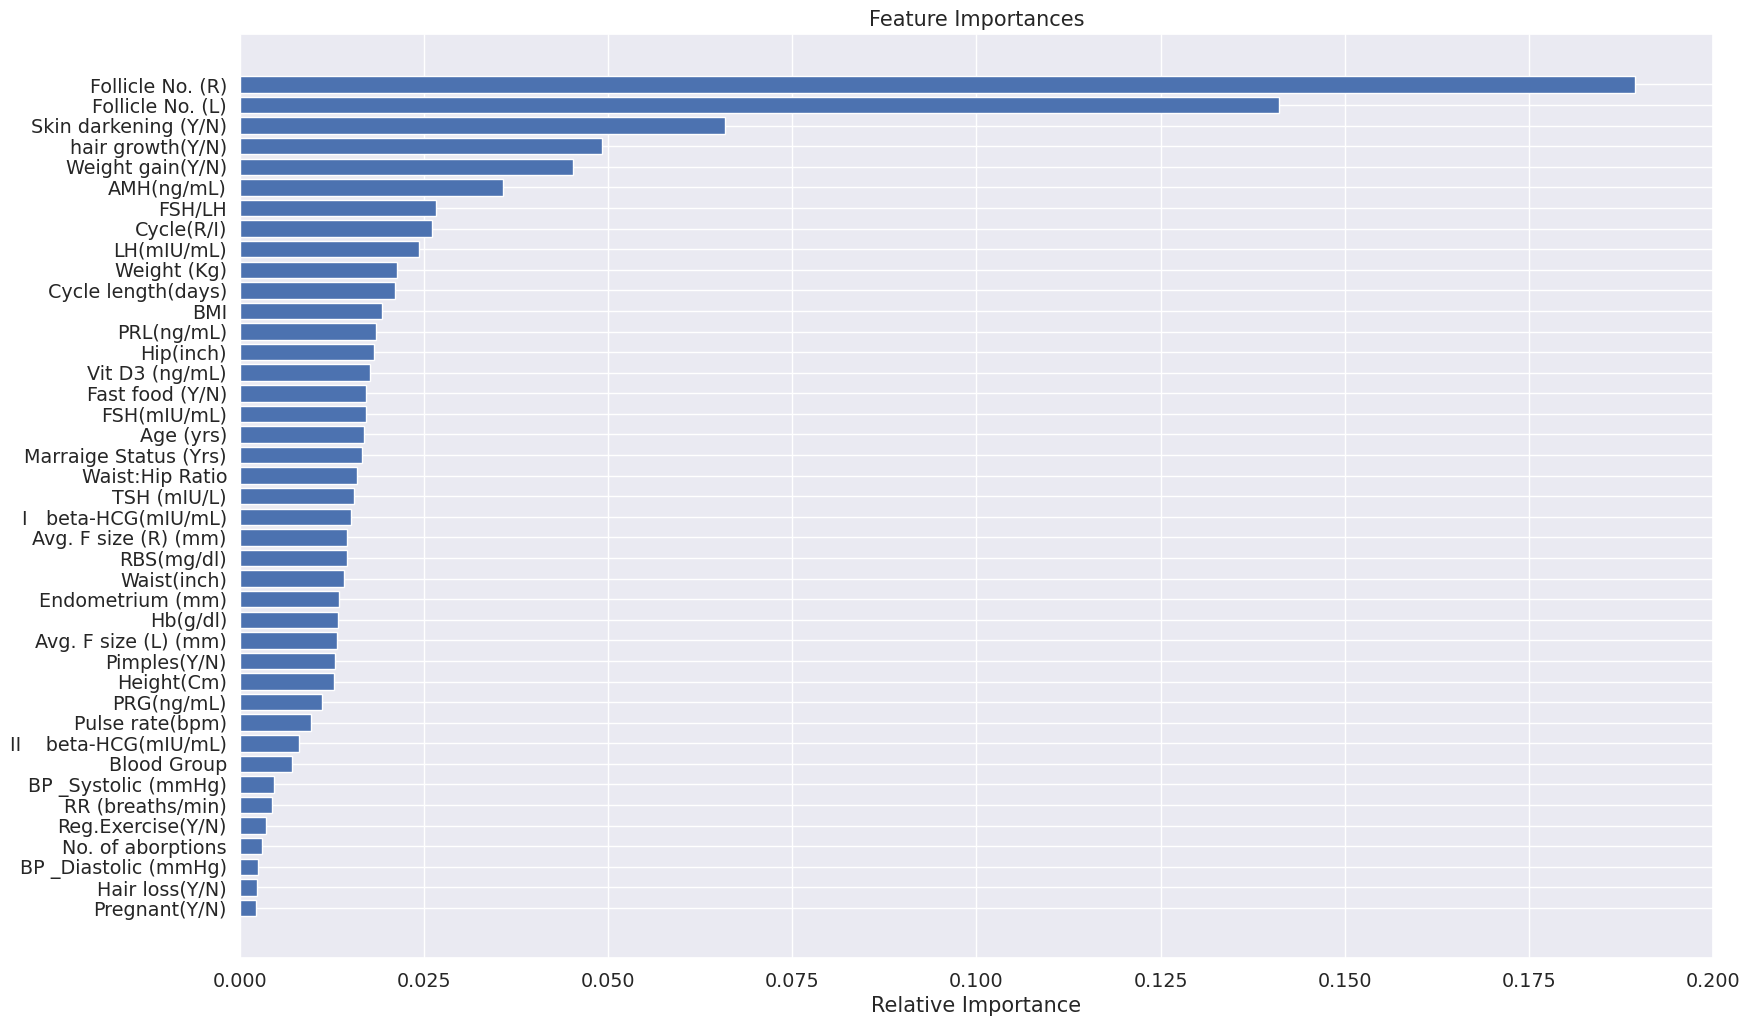

In [ ]:
# Plot Updated Feature importance graph(horizontal Bar graph)
features = X_test.columns
importances = bestCtree_rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize = (19, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.xticks([0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.150, 0.175, 0.2])
plt.grid(True)
plt.show()

In [ ]:
# Selecting only required variables and storing it in new variable 'df1'.
cols_needed = ['Follicle No. (R)', 'Follicle No. (L)', 'Skin darkening (Y/N)',
               'hair growth(Y/N)', 'Weight gain(Y/N)', 'AMH(ng/mL)',
               'Cycle(R/I)', 'FSH/LH', 'PCOS (Y/N)']
df1 = data[cols_needed]
df1.head()

Follicle No. (R)  Follicle No. (L)  Skin darkening (Y/N)  hair growth(Y/N)  \
0                 3                 3                     0                 0   
1                 5                 3                     0                 0   
2                15                13                     0                 0   
3                 2                 2                     0                 0   
4                 4                 3                     0                 0   

   Weight gain(Y/N)  AMH(ng/mL)  Cycle(R/I)    FSH/LH  PCOS (Y/N)  
0                 0        2.07           2  2.160326           0  
1                 0        1.53           2  6.174312           0  
2                 0        6.63           2  6.295455           1  
3                 0        1.22           2  3.415254           0  
4                 0        2.26           2  4.422222           0

Distribution of PCOS patients
 0    364
1    177
Name: PCOS (Y/N), dtype: int64


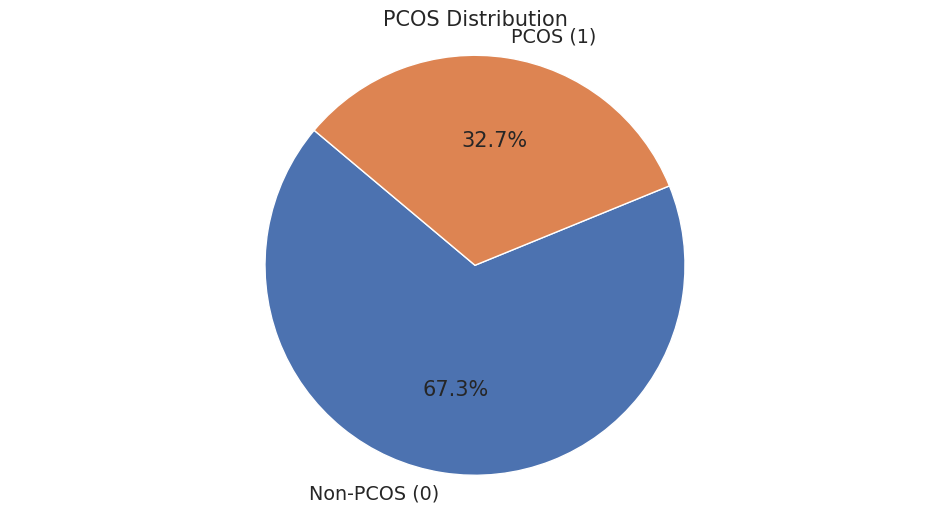

In [ ]:
# Checking how many patients have PCOS in the dataset
plt.figure(figsize = (12, 6))
plt.title("PCOS Distribution")

# Counting occurrences of 0 and 1 in the "PCOS" column
pcos_counts = df1['PCOS (Y/N)'].value_counts()
print("Distribution of PCOS patients\n", pcos_counts)
labels = ['Non-PCOS (0)', 'PCOS (1)']
plt.pie(pcos_counts, labels = labels, autopct = '%1.1f%%', startangle = 140)
plt.axis ('equal')
plt.show()

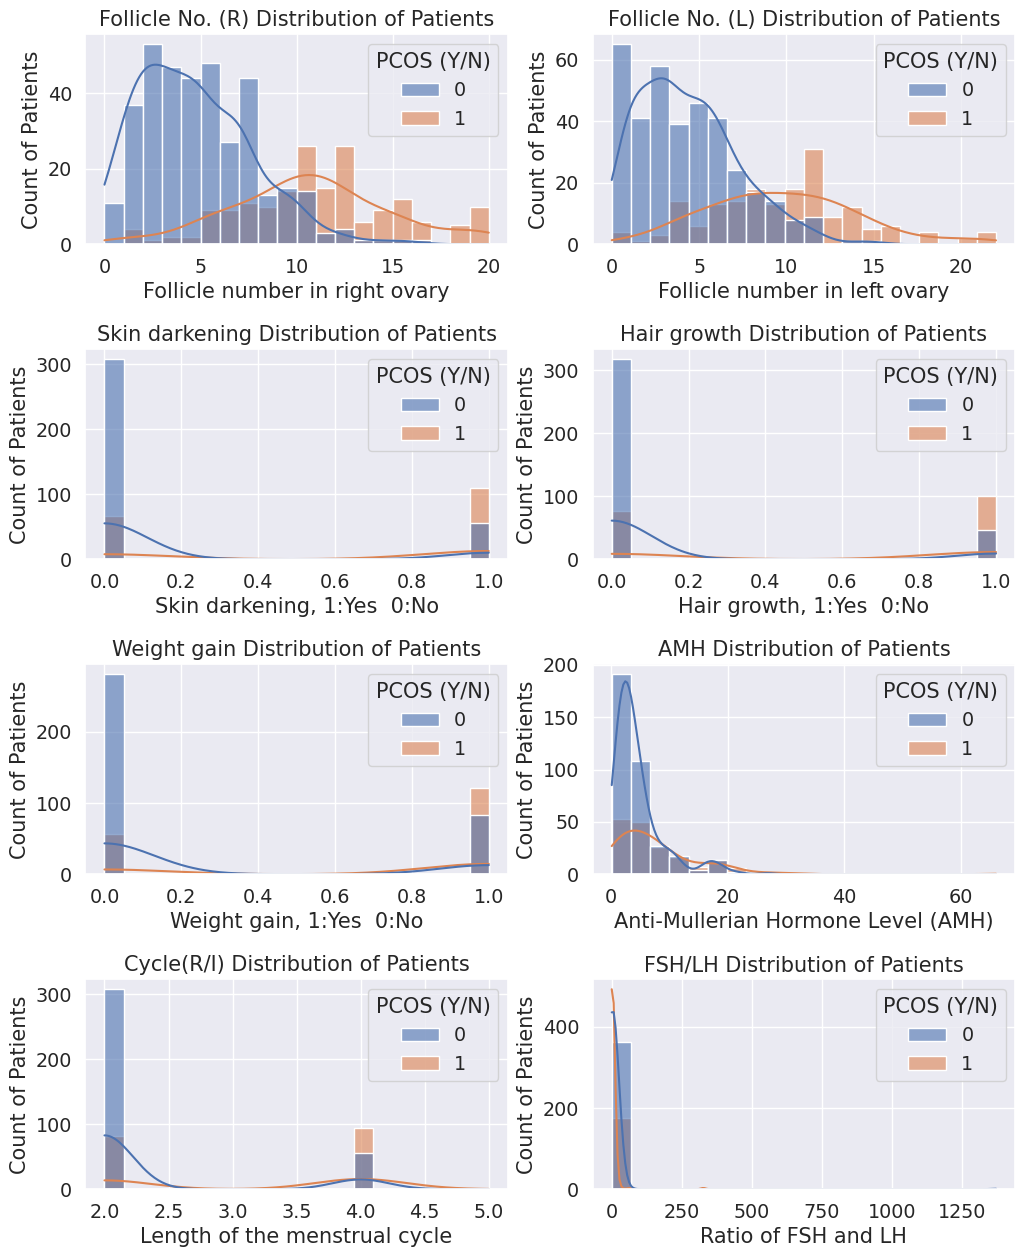

In [ ]:
# Checking the distribution of All variables
plt.figure(figsize = (12, 15))
plt.subplots_adjust(hspace = 0.5)

plt.subplot(4, 2, 1)
sns.histplot(data = df1, x = 'Follicle No. (R)', bins = 20, kde = True, hue = 'PCOS (Y/N)', alpha = 0.6)
plt.xlabel("Follicle number in right ovary")
plt.ylabel("Count of Patients")
plt.title("Follicle No. (R) Distribution of Patients")

plt.subplot(4, 2, 2)
sns.histplot(data = df1, x = 'Follicle No. (L)', bins = 20, kde = True, hue = 'PCOS (Y/N)', alpha = 0.6)
plt.xlabel("Follicle number in left ovary")
plt.ylabel("Count of Patients")
plt.title("Follicle No. (L) Distribution of Patients")

plt.subplot(4, 2, 3)
sns.histplot(data = df1, x = 'Skin darkening (Y/N)', bins = 20, kde = True, hue = 'PCOS (Y/N)', alpha = 0.6)
plt.xlabel("Skin darkening, 1:Yes  0:No")
plt.ylabel("Count of Patients")
plt.title("Skin darkening Distribution of Patients")

plt.subplot(4, 2, 4)
sns.histplot(data = df1, x = 'hair growth(Y/N)', bins = 20, kde = True, hue = 'PCOS (Y/N)', alpha = 0.6)
plt.xlabel("Hair growth, 1:Yes  0:No")
plt.ylabel("Count of Patients")
plt.title("Hair growth Distribution of Patients")

plt.subplot(4, 2, 5)
sns.histplot(data = df1, x = 'Weight gain(Y/N)', bins = 20, kde = True, hue = 'PCOS (Y/N)', alpha = 0.6)
plt.xlabel("Weight gain, 1:Yes  0:No")
plt.ylabel("Count of Patients")
plt.title("Weight gain Distribution of Patients")

plt.subplot(4, 2, 6)
sns.histplot(data = df1, x = 'AMH(ng/mL)', bins = 20, kde = True, hue = 'PCOS (Y/N)', alpha = 0.6)
plt.xlabel("Anti-Mullerian Hormone Level (AMH)")
plt.ylabel("Count of Patients")
plt.title("AMH Distribution of Patients")

plt.subplot(4, 2, 7)
sns.histplot(data = df1, x = 'Cycle(R/I)', bins = 20, kde = True, hue = 'PCOS (Y/N)', alpha = 0.6)
plt.xlabel("Length of the menstrual cycle")
plt.ylabel("Count of Patients")
plt.title("Cycle(R/I) Distribution of Patients")

plt.subplot(4, 2, 8)
sns.histplot(data = df1, x = 'FSH/LH', bins = 20, kde = True, hue = 'PCOS (Y/N)', alpha = 0.6)
plt.xlabel("Ratio of FSH and LH")
plt.ylabel("Count of Patients")
plt.title("FSH/LH Distribution of Patients")

plt.show()

<Figure size 1200x600 with 0 Axes>

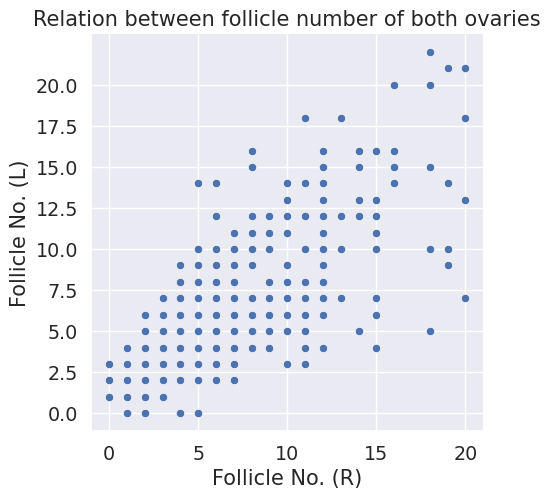

In [ ]:
# Relation between follicle no. of right and left ovary
plt.figure(figsize = (12, 6))
sns.set_style("darkgrid")
sns.relplot(data = df1, x = "Follicle No. (R)", y = 'Follicle No. (L)')
plt.yticks([0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20])
plt.title("Relation between follicle number of both ovaries")
plt.show()

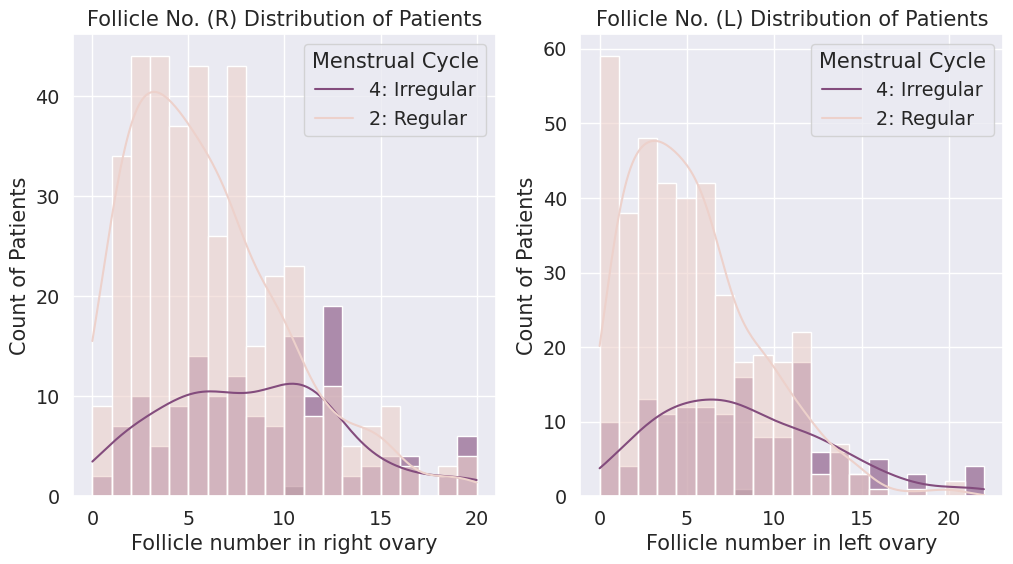

In [ ]:
# Distribution of Follicle number of both ovaries accorading to menstrual cycle
plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data = df1, x = 'Follicle No. (R)', bins = 20, kde = True, hue = 'Cycle(R/I)', alpha = 0.6)
plt.xlabel("Follicle number in right ovary")
plt.ylabel("Count of Patients")
plt.title("Follicle No. (R) Distribution of Patients")
plt.legend(title = "Menstrual Cycle", labels = ['4: Irregular' , '2: Regular'])


plt.subplot(1, 2, 2)
sns.histplot(data = df1, x = 'Follicle No. (L)', bins = 20, kde = True, hue = 'Cycle(R/I)', alpha = 0.6)
plt.xlabel("Follicle number in left ovary")
plt.ylabel("Count of Patients")
plt.title("Follicle No. (L) Distribution of Patients")
plt.legend(title = "Menstrual Cycle", labels = ['4: Irregular' , '2: Regular'])

plt.show()

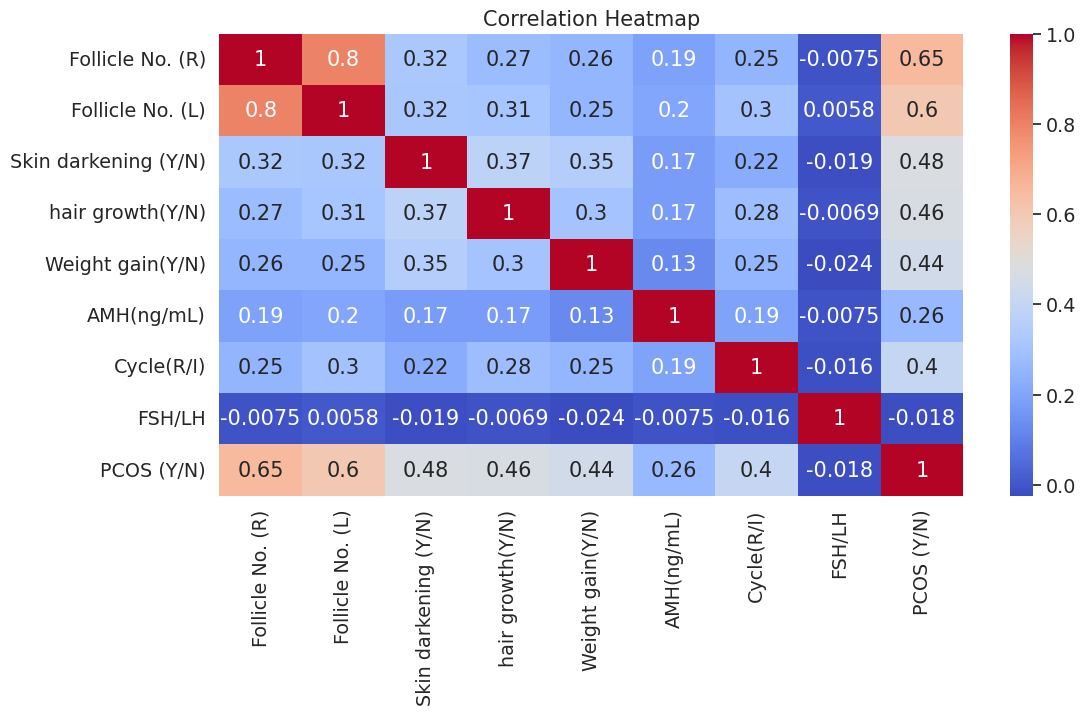

In [ ]:
# Creating correlation matrix
corr_matrix = df1.corr()
plt.figure(figsize = (12, 6))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.title("Correlation Heatmap")
plt.show()

<ipython-input-49-c671f3cc5543>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = corr_with_pcos.index, y = corr_with_pcos.values, palette = 'coolwarm')


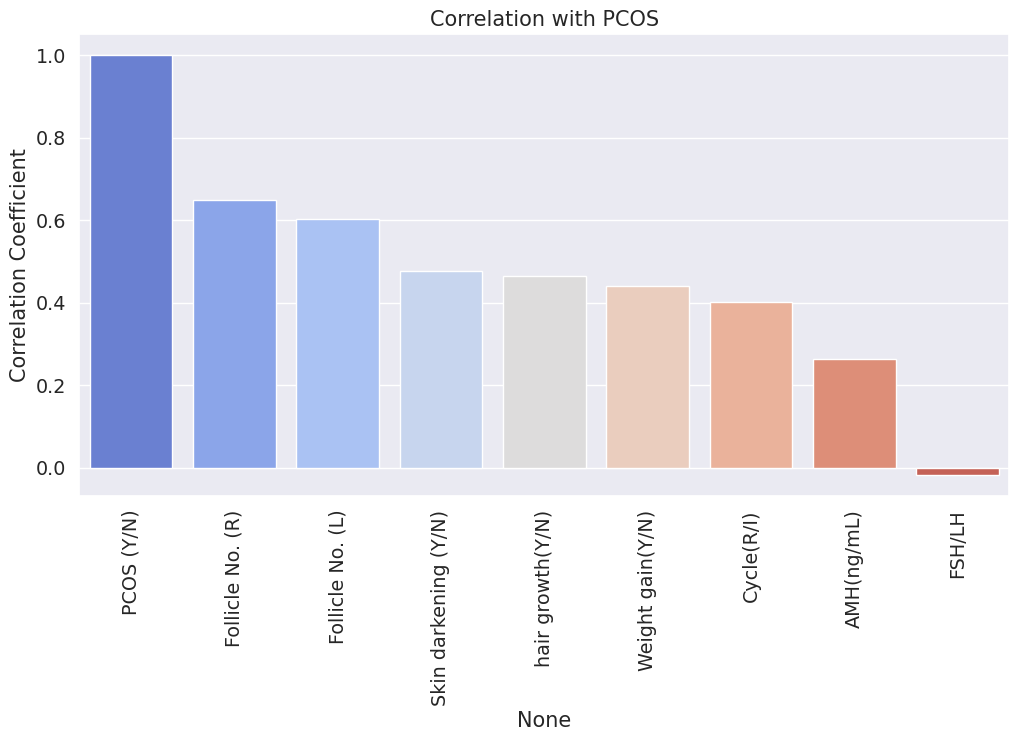

In [ ]:
# Correlation with PCOS
corr_with_pcos = corr_matrix['PCOS (Y/N)'].sort_values(ascending = False)
plt.figure(figsize = (12, 6))
sns.barplot(x = corr_with_pcos.index, y = corr_with_pcos.values, palette = 'coolwarm')
plt.xticks(rotation = 90)
plt.title("Correlation with PCOS")
plt.ylabel("Correlation Coefficient")
plt.show()

In [ ]:
# Preprocessing the data
X = df1.drop(columns = 'PCOS (Y/N)', axis = 1)
y = df1['PCOS (Y/N)']

# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of train and test data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(432, 8)
(432,)
(109, 8)
(109,)


Logistic Regression Model


In [ ]:
# Load Logistic Regression in 'lr_model' variable
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Predict for X_test data
predictions = lr_model.predict(X_test)

# Check the accuracy of the model
print('training accuracy:', lr_model.score(X_train, y_train))
print('test accuracy:',lr_model.score(X_test, y_test))

training accuracy: 0.9097222222222222
test accuracy: 0.8532110091743119


<Axes: >

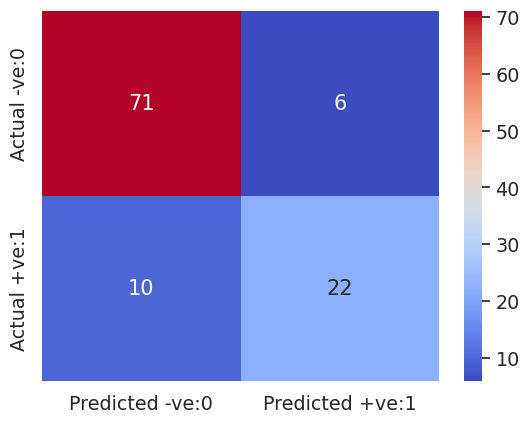

In [ ]:
# Visualize confusion matrix with seaborn heatmap
cm = confusion_matrix(y_test, predictions)
cm_matrix = pd.DataFrame(data = cm, columns = ['Predicted -ve:0', 'Predicted +ve:1'],
                         index = ['Actual -ve:0', 'Actual +ve:1'])
sns.heatmap(cm_matrix, annot = True, fmt = 'd', cmap = 'coolwarm')

In [ ]:
# Classification Report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        77
           1       0.79      0.69      0.73        32

    accuracy                           0.85       109
   macro avg       0.83      0.80      0.82       109
weighted avg       0.85      0.85      0.85       109



KNN Model

Cross-Validation Scores: [0.94252874 0.88505747 0.90697674 0.8372093  0.88372093]
Mean Cross-Validation Score: 0.8910986367281476
Test Accuracy: 0.8348623853211009
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89        77
           1       0.85      0.53      0.65        32

    accuracy                           0.83       109
   macro avg       0.84      0.75      0.77       109
weighted avg       0.84      0.83      0.82       109



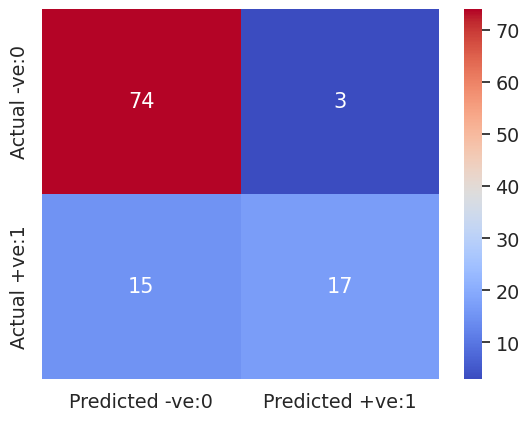

In [ ]:
# Feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Adjust the number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can experiment with different values

# Train the KNN model on the scaled training data
knn_model.fit(X_train_scaled, y_train)

# Evaluate the model using cross-validation on the scaled data
cv_scores = cross_val_score(knn_model, X_train_scaled, y_train, cv=5)  # Adjust the number of folds as needed

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

# Predict for the scaled test data
knn_predictions = knn_model.predict(X_test_scaled)

# Check the accuracy of the model on the test set
accuracy = accuracy_score(y_test, knn_predictions)
print('Test Accuracy:', accuracy)

# Visualize confusion matrix with seaborn heatmap
cm_knn = confusion_matrix(y_test, knn_predictions)
cm_matrix_knn = pd.DataFrame(data=cm_knn, columns=['Predicted -ve:0', 'Predicted +ve:1'],
                              index=['Actual -ve:0', 'Actual +ve:1'])
sns.heatmap(cm_matrix_knn, annot=True, fmt='d', cmap='coolwarm')

# Classification Report
print("Classification Report:")
print(classification_report(y_test, knn_predictions))


Naive Bayes Model

Training Accuracy: 0.8449074074074074
Test Accuracy: 0.7981651376146789
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.78      0.85        77
           1       0.61      0.84      0.71        32

    accuracy                           0.80       109
   macro avg       0.77      0.81      0.78       109
weighted avg       0.83      0.80      0.81       109



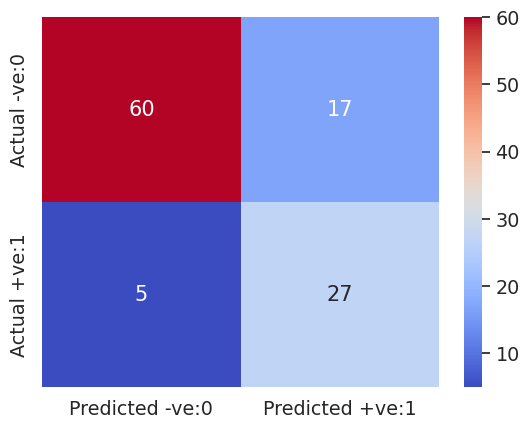

In [ ]:
# Initialize the Gaussian Naive Bayes model
nb_model = GaussianNB(var_smoothing=1e-9)  # Adjust var_smoothing as needed

# Train the Naive Bayes model
nb_model.fit(X_train, y_train)

# Predict for X_test data
nb_predictions = nb_model.predict(X_test)

# Check the accuracy of the model
print('Training Accuracy:', nb_model.score(X_train, y_train))
print('Test Accuracy:', nb_model.score(X_test, y_test))

# Visualize confusion matrix with seaborn heatmap
cm_nb = confusion_matrix(y_test, nb_predictions)
cm_matrix_nb = pd.DataFrame(data=cm_nb, columns=['Predicted -ve:0', 'Predicted +ve:1'],
                            index=['Actual -ve:0', 'Actual +ve:1'])
sns.heatmap(cm_matrix_nb, annot=True, fmt='d', cmap='coolwarm')

# Classification Report
print("Classification Report:")
print(classification_report(y_test, nb_predictions))


Neural Network Model

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Training Accuracy: 0.9537037037037037
Test Accuracy: 0.8715596330275229
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        77
           1       0.85      0.69      0.76        32

    accuracy                           0.87       109
   macro avg       0.86      0.82      0.84       109
weighted avg       0.87      0.87      0.87       109



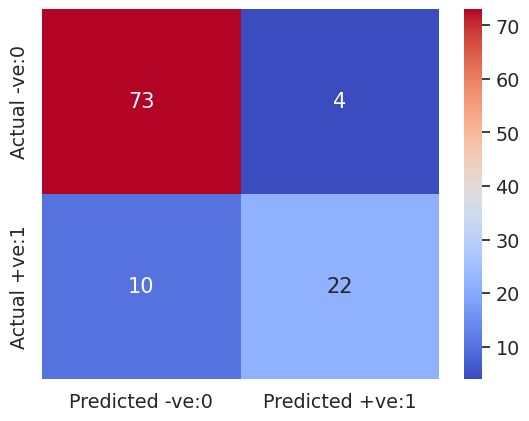

In [ ]:
# Initialize the Neural Network model
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)  # Adjust parameters as needed

# Train the Neural Network model
nn_model.fit(X_train, y_train)

# Predict for X_test data
nn_predictions = nn_model.predict(X_test)

# Check the accuracy of the model
print('Training Accuracy:', nn_model.score(X_train, y_train))
print('Test Accuracy:', nn_model.score(X_test, y_test))

# Visualize confusion matrix with seaborn heatmap
cm_nn = confusion_matrix(y_test, nn_predictions)
cm_matrix_nn = pd.DataFrame(data=cm_nn, columns=['Predicted -ve:0', 'Predicted +ve:1'],
                            index=['Actual -ve:0', 'Actual +ve:1'])
sns.heatmap(cm_matrix_nn, annot=True, fmt='d', cmap='coolwarm')

# Classification Report
print("Classification Report:")
print(classification_report(y_test, nn_predictions))


LDA Model

Training Accuracy: 0.9189814814814815
Test Accuracy: 0.8807339449541285
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        77
           1       0.88      0.69      0.77        32

    accuracy                           0.88       109
   macro avg       0.88      0.82      0.85       109
weighted avg       0.88      0.88      0.88       109



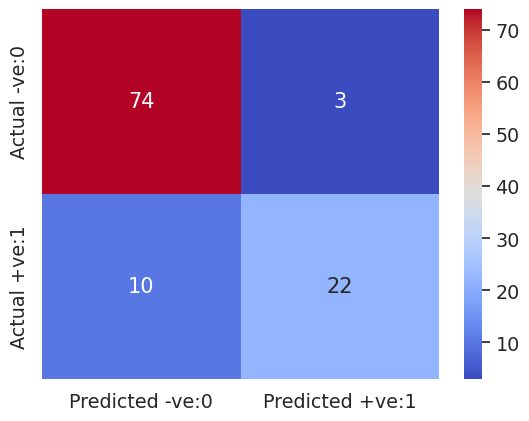

In [ ]:
# Initialize the LDA model
lda_model = LinearDiscriminantAnalysis()

# Train the LDA model
lda_model.fit(X_train, y_train)

# Predict for X_test data
lda_predictions = lda_model.predict(X_test)

# Check the accuracy of the model
print('Training Accuracy:', lda_model.score(X_train, y_train))
print('Test Accuracy:', lda_model.score(X_test, y_test))

# Visualize confusion matrix with seaborn heatmap
cm_lda = confusion_matrix(y_test, lda_predictions)
cm_matrix_lda = pd.DataFrame(data=cm_lda, columns=['Predicted -ve:0', 'Predicted +ve:1'],
                             index=['Actual -ve:0', 'Actual +ve:1'])
sns.heatmap(cm_matrix_lda, annot=True, fmt='d', cmap='coolwarm')

# Classification Report
print("Classification Report:")
print(classification_report(y_test, lda_predictions))


QDA Model

Training Accuracy: 0.8078703703703703
Test Accuracy: 0.7614678899082569
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.71      0.81        77
           1       0.56      0.88      0.68        32

    accuracy                           0.76       109
   macro avg       0.75      0.79      0.75       109
weighted avg       0.82      0.76      0.77       109



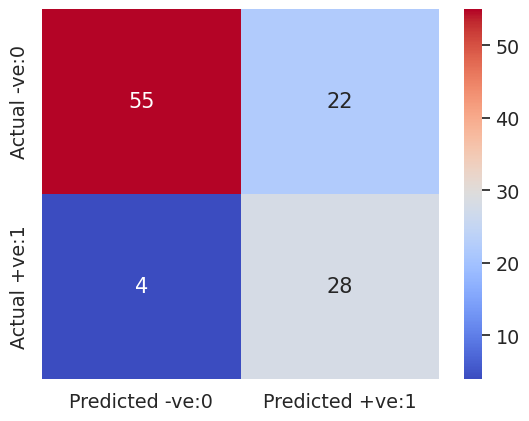

In [ ]:
# Initialize the QDA model
qda_model = QuadraticDiscriminantAnalysis()

# Train the QDA model
qda_model.fit(X_train, y_train)

# Predict for X_test data
qda_predictions = qda_model.predict(X_test)

# Check the accuracy of the model
print('Training Accuracy:', qda_model.score(X_train, y_train))
print('Test Accuracy:', qda_model.score(X_test, y_test))

# Visualize confusion matrix with seaborn heatmap
cm_qda = confusion_matrix(y_test, qda_predictions)
cm_matrix_qda = pd.DataFrame(data=cm_qda, columns=['Predicted -ve:0', 'Predicted +ve:1'],
                              index=['Actual -ve:0', 'Actual +ve:1'])
sns.heatmap(cm_matrix_qda, annot=True, fmt='d', cmap='coolwarm')

# Classification Report
print("Classification Report:")
print(classification_report(y_test, qda_predictions))


Nearest Centroid Classifier Model

Training Accuracy: 0.8032407407407407
Test Accuracy: 0.7431192660550459
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.75      0.81        77
           1       0.55      0.72      0.62        32

    accuracy                           0.74       109
   macro avg       0.71      0.74      0.71       109
weighted avg       0.77      0.74      0.75       109



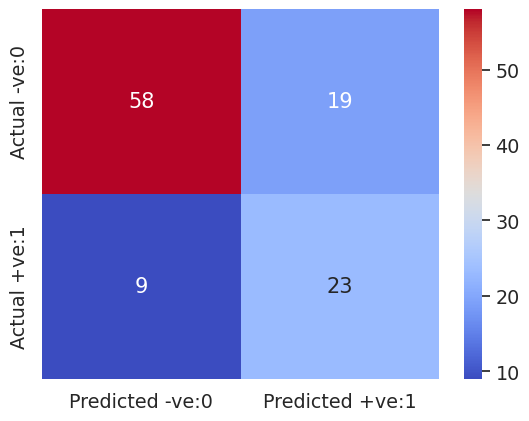

In [ ]:
# Initialize the Nearest Centroid Classifier model
nearest_centroid_model = NearestCentroid()

# Train the Nearest Centroid Classifier model
nearest_centroid_model.fit(X_train, y_train)

# Predict for X_test data
nearest_centroid_predictions = nearest_centroid_model.predict(X_test)

# Check the accuracy of the model
print('Training Accuracy:', nearest_centroid_model.score(X_train, y_train))
print('Test Accuracy:', nearest_centroid_model.score(X_test, y_test))

# Visualize confusion matrix with seaborn heatmap
cm_nearest_centroid = confusion_matrix(y_test, nearest_centroid_predictions)
cm_matrix_nearest_centroid = pd.DataFrame(data=cm_nearest_centroid, columns=['Predicted -ve:0', 'Predicted +ve:1'],
                                          index=['Actual -ve:0', 'Actual +ve:1'])
sns.heatmap(cm_matrix_nearest_centroid, annot=True, fmt='d', cmap='coolwarm')

# Classification Report
print("Classification Report:")
print(classification_report(y_test, nearest_centroid_predictions))


Gaussian Process Classifier Model

Training Accuracy: 0.8935185185185185
Test Accuracy: 0.7981651376146789
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        77
           1       0.67      0.62      0.65        32

    accuracy                           0.80       109
   macro avg       0.76      0.75      0.75       109
weighted avg       0.79      0.80      0.80       109



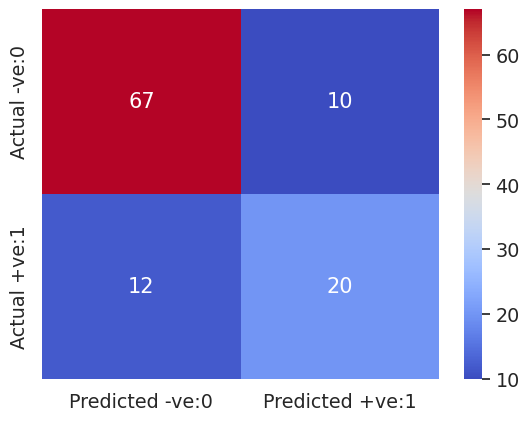

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
# Initialize the Gaussian Process Classifier model
gp_model = GaussianProcessClassifier(kernel=RBF(1.0))

# Train the Gaussian Process Classifier model
gp_model.fit(X_train, y_train)

# Predict for X_test data
gp_predictions = gp_model.predict(X_test)

# Check the accuracy of the model
print('Training Accuracy:', gp_model.score(X_train, y_train))
print('Test Accuracy:', gp_model.score(X_test, y_test))

# Visualize confusion matrix with seaborn heatmap
cm_gp = confusion_matrix(y_test, gp_predictions)
cm_matrix_gp = pd.DataFrame(data=cm_gp, columns=['Predicted -ve:0', 'Predicted +ve:1'],
                             index=['Actual -ve:0', 'Actual +ve:1'])
sns.heatmap(cm_matrix_gp, annot=True, fmt='d', cmap='coolwarm')

# Classification Report
print("Classification Report:")
print(classification_report(y_test, gp_predictions))


Decision tree Model

In [ ]:
# Load DecisionTreeClassifier in variable 'ctree'
ctree = DecisionTreeClassifier(random_state = 0, max_depth = 4)

# Train model on X_train and y_train data
ctree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

<ipython-input-63-d9185ca574df>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


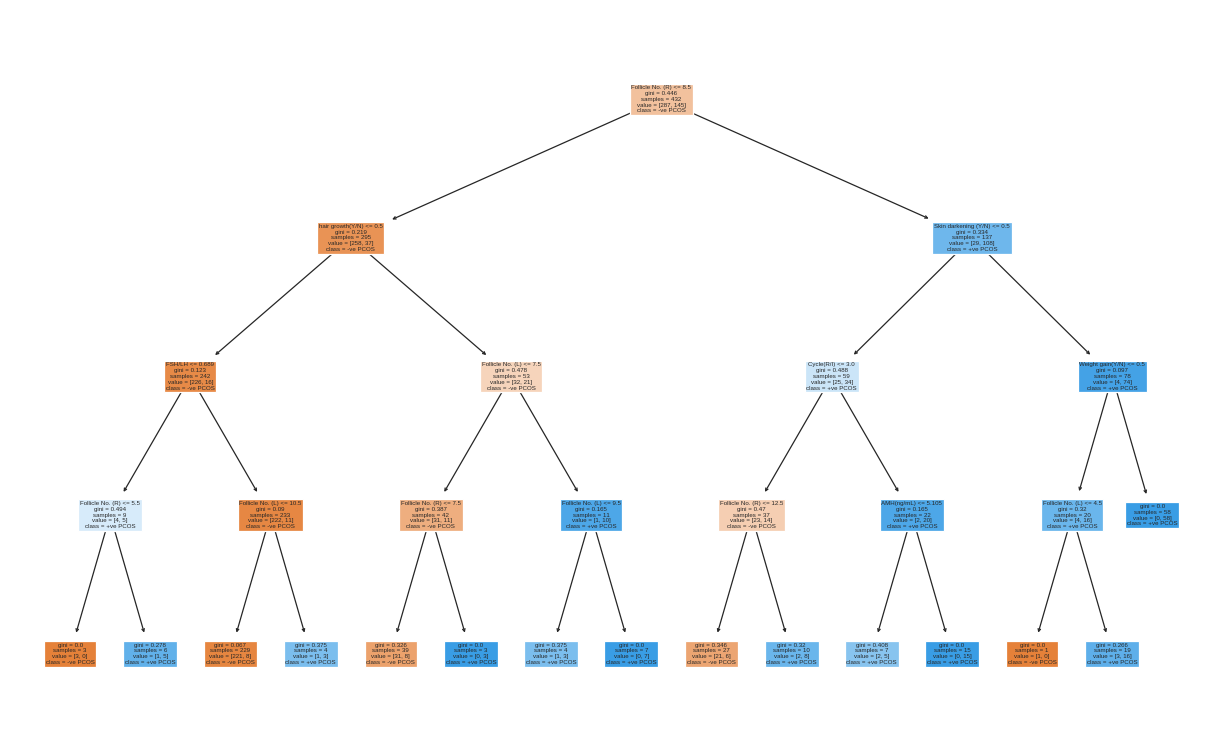

In [ ]:
# Plot the Tree
plt.style.use('seaborn')
fig = plt.figure(figsize=(5,3), dpi = 300)
_ = plot_tree(ctree,
                   feature_names=X.columns,
                   class_names=['-ve PCOS', '+ve PCOS'],
                   filled=True)

In [ ]:
# Predict for X_test data
ctree_predictions = ctree.predict(X_test)

# Check the accuracy of the model
print('training accuracy:', ctree.score(X_train, y_train))
print('test accuracy:', ctree.score(X_test, y_test))

training accuracy: 0.9259259259259259
test accuracy: 0.8348623853211009


<Axes: >

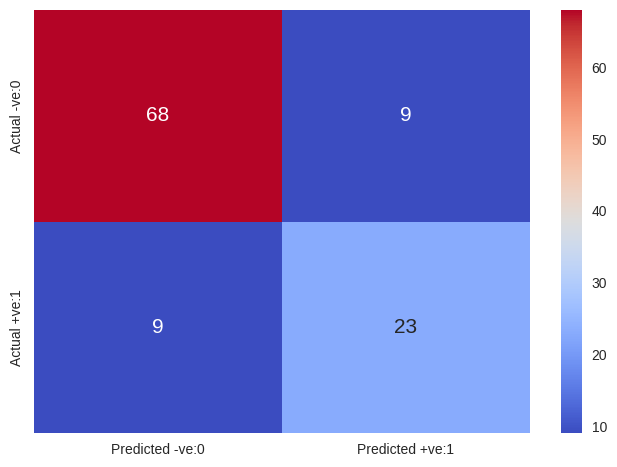

In [ ]:
# Confusion Matrix for 'ctree'
cm = confusion_matrix(y_test, ctree_predictions)
cm_matrix = pd.DataFrame(data=cm, columns=['Predicted -ve:0', 'Predicted +ve:1'],
                                 index=['Actual -ve:0', 'Actual +ve:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='coolwarm')

In [ ]:
# Classification Report for 'ctree'
print(classification_report(y_test, ctree_predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        77
           1       0.72      0.72      0.72        32

    accuracy                           0.83       109
   macro avg       0.80      0.80      0.80       109
weighted avg       0.83      0.83      0.83       109



Full Grown tree Model

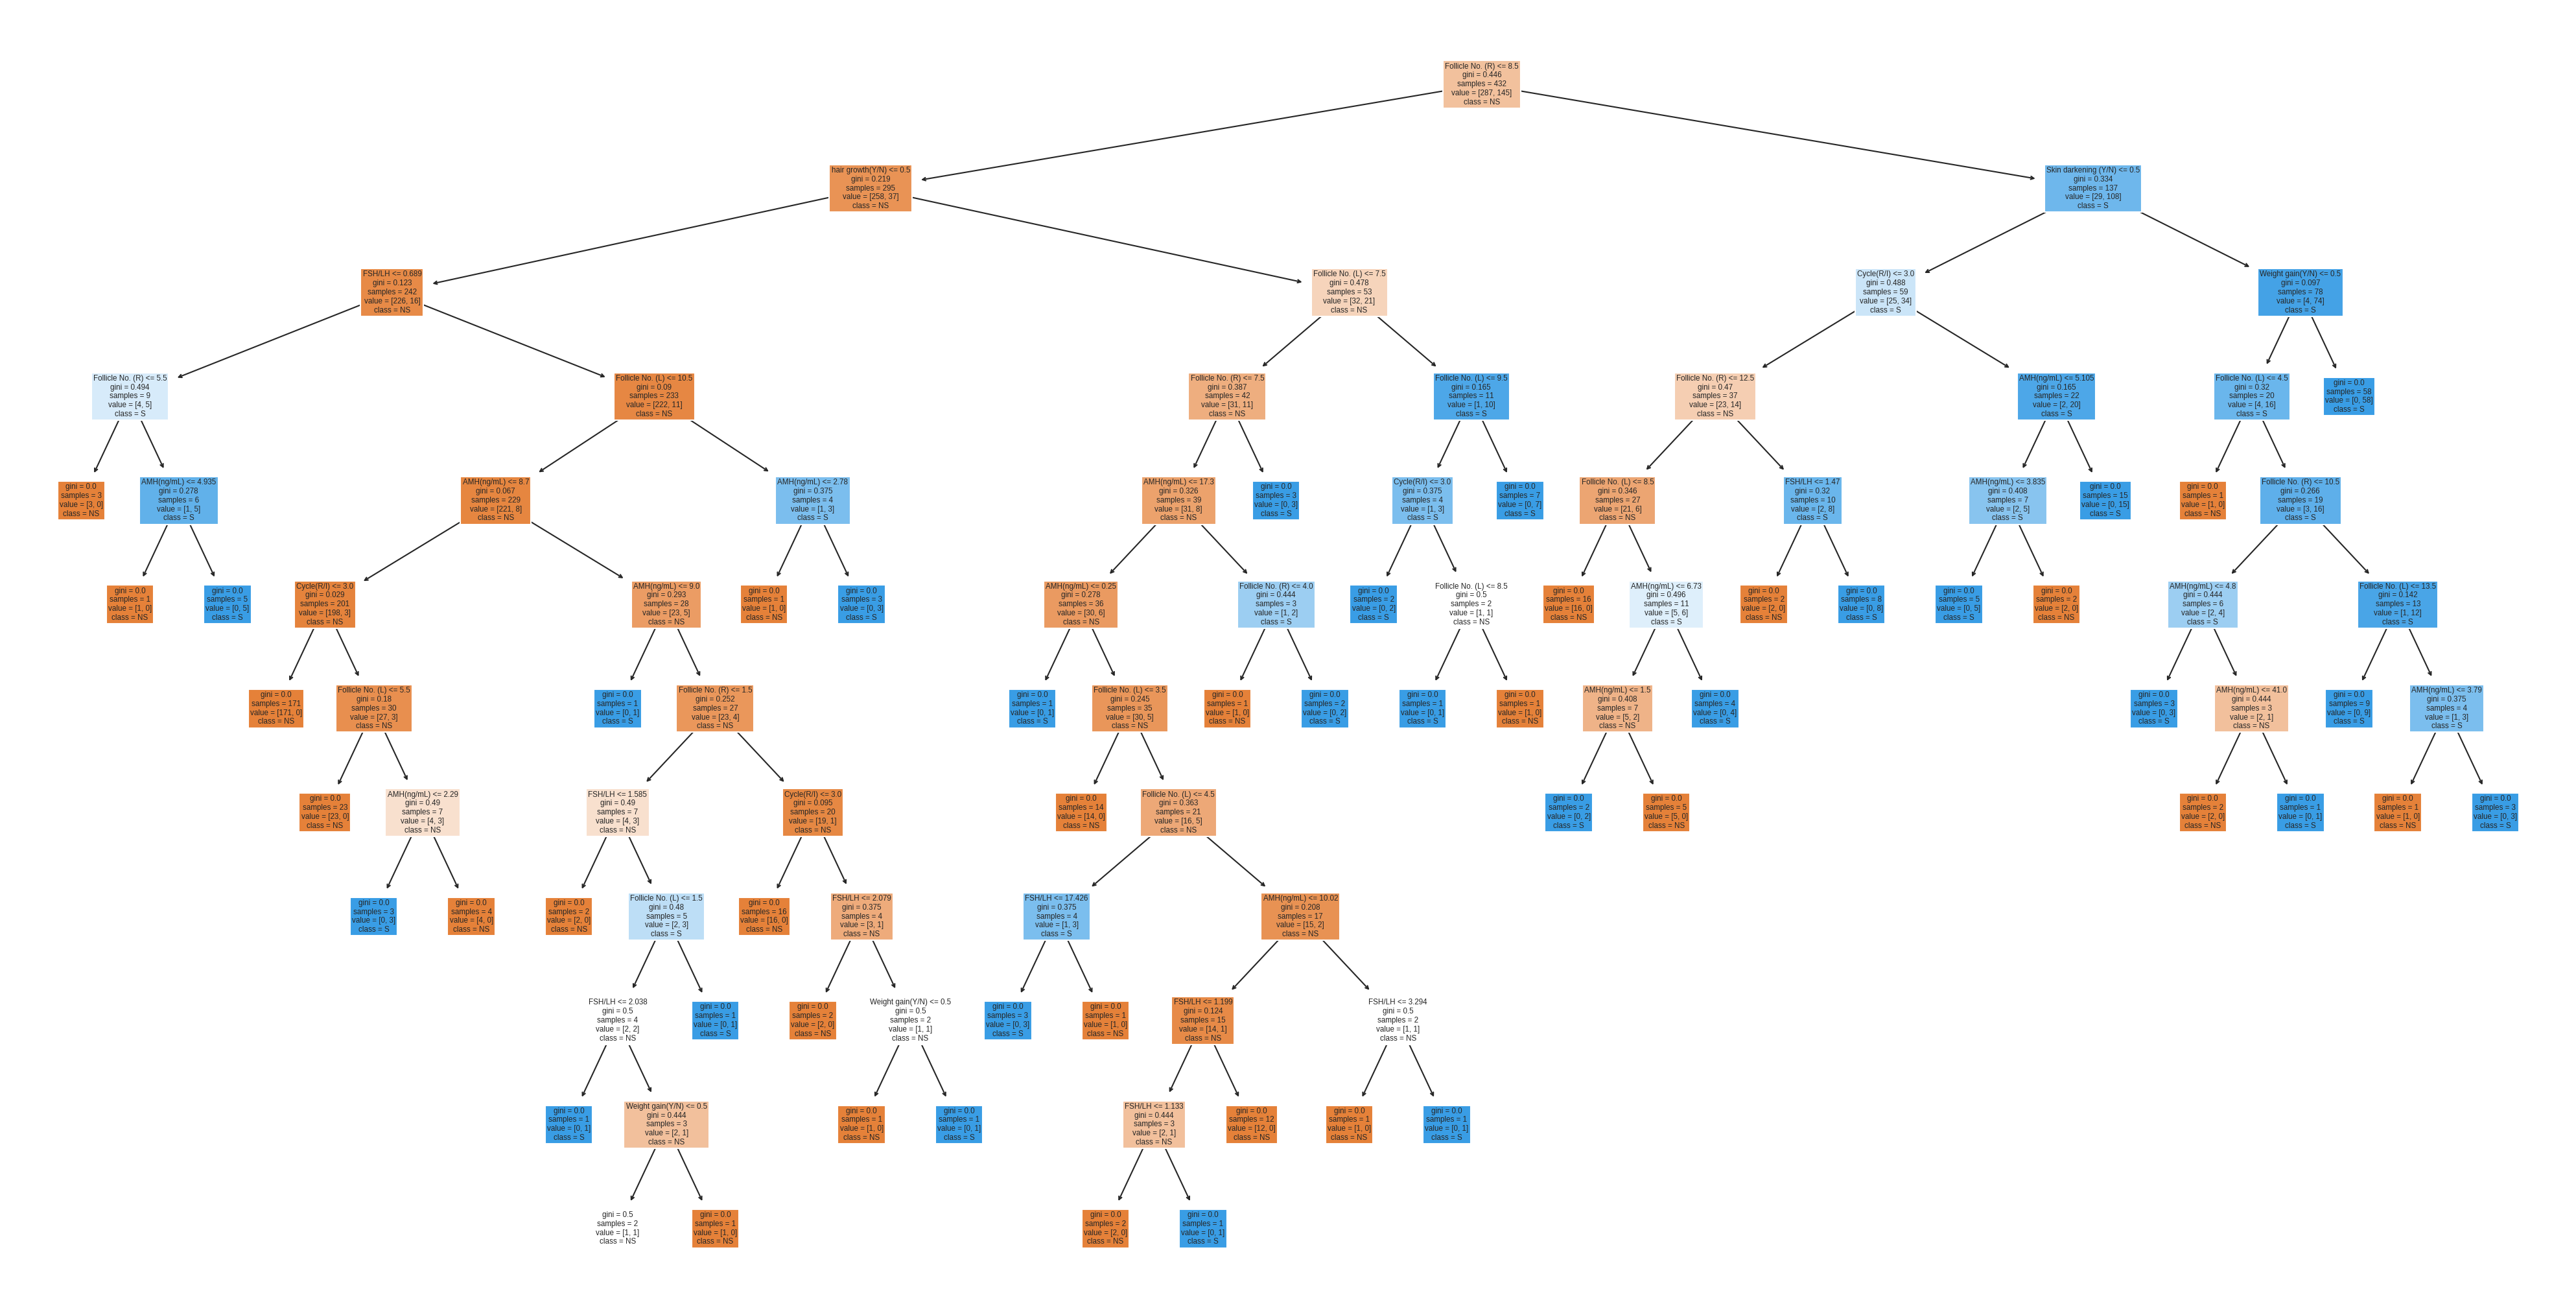

In [ ]:
# Full Grown tree
fulltree = DecisionTreeClassifier(random_state = 0)
fulltree.fit(X_train,y_train)

fig = plt.figure(figsize=(10,5), dpi = 500)
_ = plot_tree(fulltree,
                   feature_names=X.columns,
                   class_names=['NS', 'S'],
                   filled=True)

In [ ]:
# Predict for X_test data
fulltree_predictions = fulltree.predict(X_test)

# Check the accuracy of the model
print('training accuracy:', fulltree.score(X_train, y_train))
print('test accuracy:', fulltree.score(X_test, y_test))

training accuracy: 0.9976851851851852
test accuracy: 0.7889908256880734


<Axes: >

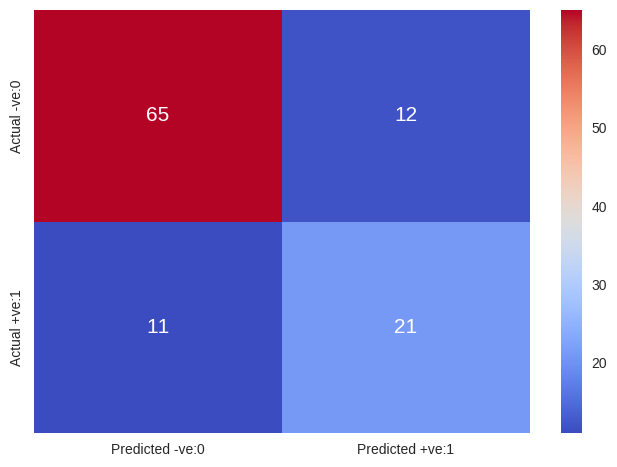

In [ ]:
# Confusion Matrix for 'fulltree'
cm = confusion_matrix(y_test, fulltree_predictions)
cm_matrix = pd.DataFrame(data=cm, columns=['Predicted -ve:0', 'Predicted +ve:1'],
                                 index=['Actual -ve:0', 'Actual +ve:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='coolwarm')

In [ ]:
# Classification Report for 'fulltree'
print(classification_report(y_test, fulltree_predictions))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        77
           1       0.64      0.66      0.65        32

    accuracy                           0.79       109
   macro avg       0.75      0.75      0.75       109
weighted avg       0.79      0.79      0.79       109



In [ ]:
# Start with an initial guess for params
param_grid = {
    'max_depth': [10,20,30, 40],
    'min_samples_split': [20,40,60,80,100],
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01],
    'criterion':['gini','entropy']
}

In [ ]:
# Run Gridsearch
gridsearch = GridSearchCV(DecisionTreeClassifier(random_state = 1),
                         param_grid,
                         cv = 5,
                         n_jobs = -1)
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40],
                         'min_impurity_decrease': [0, 0.0005, 0.001, 0.005,
                                                   0.01],
                         'min_samples_split': [20, 40, 60, 80, 100]})

In [ ]:
# Print result of GridSearch
print_results(gridsearch)

BEST PARAMS: {'criterion': 'gini', 'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_split': 40}

0.859 (+/-0.028) for {'criterion': 'gini', 'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_split': 20}
0.863 (+/-0.037) for {'criterion': 'gini', 'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_split': 40}
0.845 (+/-0.09) for {'criterion': 'gini', 'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_split': 60}
0.852 (+/-0.099) for {'criterion': 'gini', 'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_split': 80}
0.852 (+/-0.099) for {'criterion': 'gini', 'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_split': 100}
0.856 (+/-0.029) for {'criterion': 'gini', 'max_depth': 10, 'min_impurity_decrease': 0.0005, 'min_samples_split': 20}
0.863 (+/-0.037) for {'criterion': 'gini', 'max_depth': 10, 'min_impurity_decrease': 0.0005, 'min_samples_split': 40}
0.845 (+/-0.09) for {'criterion': 'gini', 'max_depth': 10, 'min_impurity_decrease': 0.0005, '

In [ ]:
print('Initial score:', gridsearch.best_score_)
print('Initial parameters:', gridsearch.best_params_)

Initial score: 0.8634322373696872
Initial parameters: {'criterion': 'gini', 'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_split': 40}


In [ ]:
# Adopt the params
param_grid = {
    'max_depth': [None,1,2,3,4,5,8,10,12],
    'min_samples_split': [10,20,30,40,50,60,70],
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01],
    'criterion':['gini', 'entropy']
}

gridsearch = GridSearchCV(DecisionTreeClassifier(random_state = 1),
                         param_grid,
                         cv = 5,
                         n_jobs = -1)
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 3, 4, 5, 8, 10, 12],
                         'min_impurity_decrease': [0, 0.0005, 0.001, 0.005,
                                                   0.01],
                         'min_samples_split': [10, 20, 30, 40, 50, 60, 70]})

In [ ]:
print('Improved score:', gridsearch.best_score_)
print('Improved parameters:', gridsearch.best_params_)

Improved score: 0.8726276396685378
Improved parameters: {'criterion': 'gini', 'max_depth': 4, 'min_impurity_decrease': 0, 'min_samples_split': 20}


In [ ]:
# Take the best estimator
bestCtree = gridsearch.best_estimator_

# Predict for X_test data
bestCtree_predictions = bestCtree.predict(X_test)

# Print accuracy score
print(accuracy_score(y_test, bestCtree_predictions))

0.8256880733944955


<Axes: >

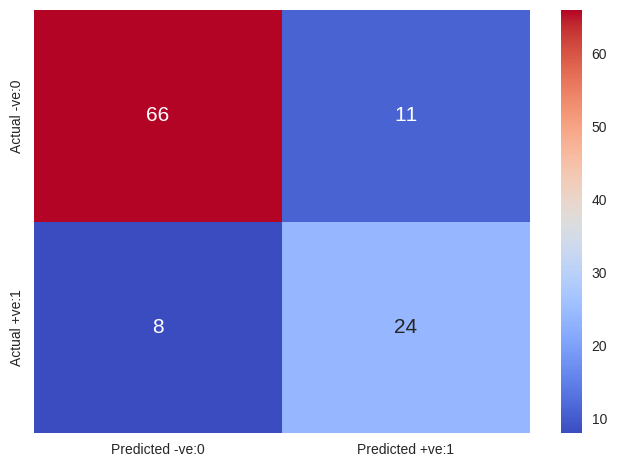

In [ ]:
# Confusion Matrix for 'bestCtree'
cm = confusion_matrix(y_test, bestCtree_predictions)
cm_matrix = pd.DataFrame(data=cm, columns=['Predicted -ve:0', 'Predicted +ve:1'],
                                 index=['Actual -ve:0', 'Actual +ve:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='coolwarm')

In [ ]:
# Classification Report for 'bestCtree'
print(classification_report(y_test, bestCtree_predictions))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87        77
           1       0.69      0.75      0.72        32

    accuracy                           0.83       109
   macro avg       0.79      0.80      0.80       109
weighted avg       0.83      0.83      0.83       109



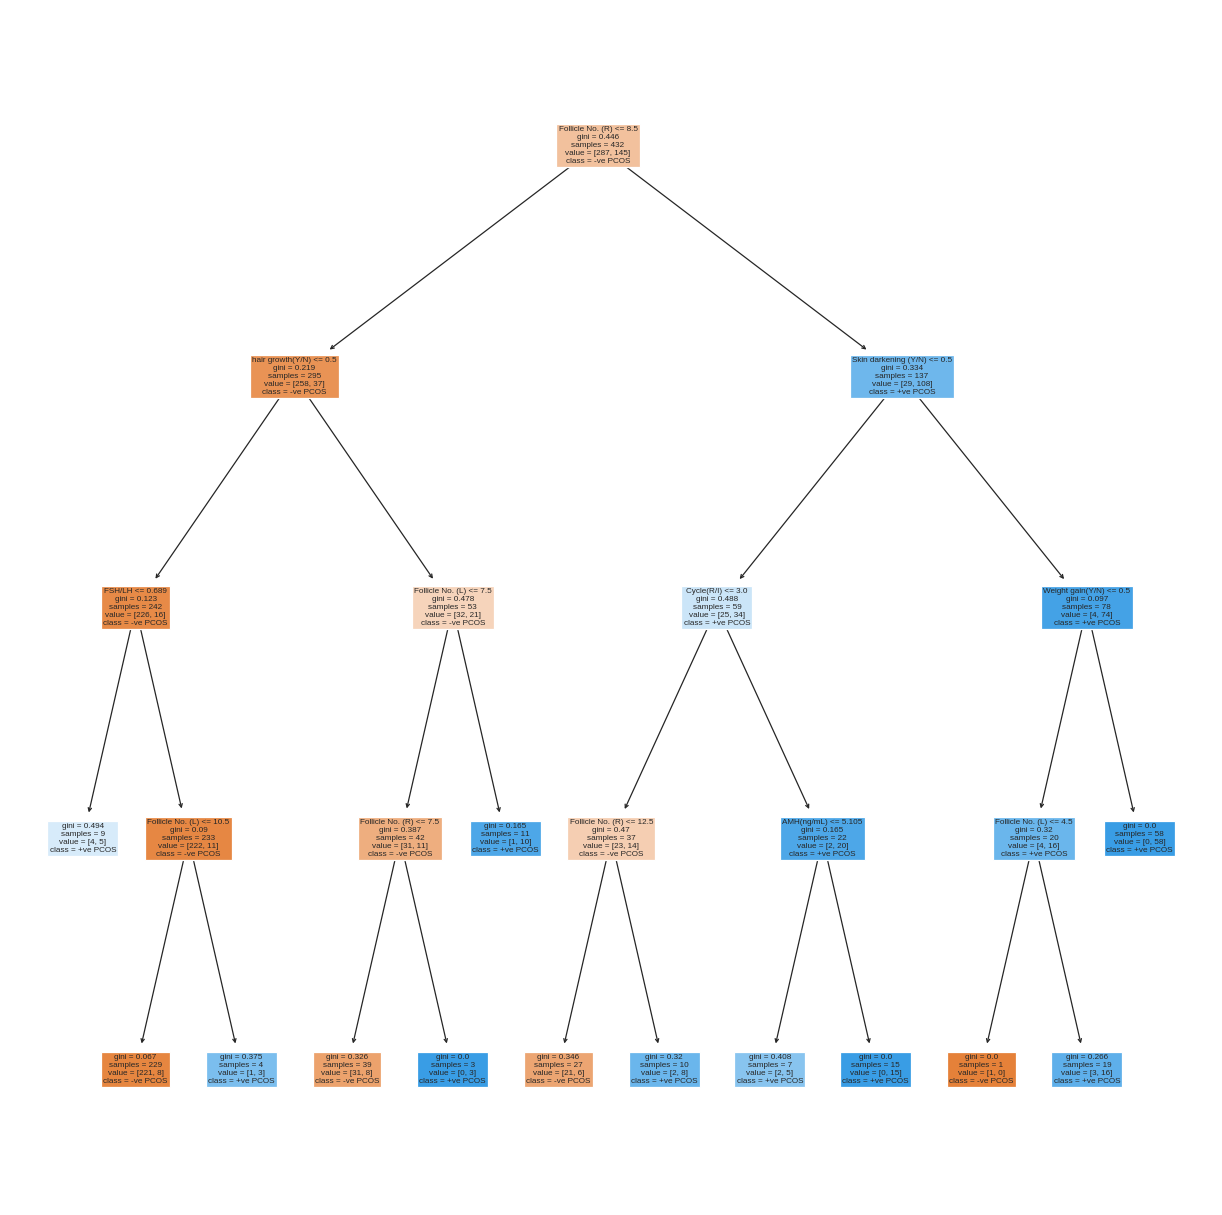

In [ ]:
# Plot 'bestCtree'
fig = plt.figure(figsize=(5,5), dpi = 300)
_ = plot_tree(bestCtree,
                   feature_names=X.columns,
                   class_names=['-ve PCOS', '+ve PCOS'],
                   filled=True)

In [ ]:
# I have choose Logistic Regression, DecisionTree Classifier and Support Vector Machine for voting classifier.
log_clf = LogisticRegression()
dtr_clf = DecisionTreeClassifier(max_depth = 4)
svm_clf = SVC(probability=True)

# Assign voting classifier in 'voting_clf' variable
voting_clf = VotingClassifier(
    estimators = [('lr', log_clf),('dt',dtr_clf),('svc', svm_clf)],
    voting = 'soft',
    weights=[2,2,1]
)

# Train the model on X_train and y_train data
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier(max_depth=4)),
                             ('svc', SVC(probability=True))],
                 voting='soft', weights=[2, 2, 1])

In [ ]:
# Print accuracy score of individual model and voting classifier model
for clf in voting_clf.named_estimators_:
    y_pred = voting_clf.named_estimators_[clf].predict(X_test)
    print(clf,":", accuracy_score(y_test, y_pred))

# Predict for X_test data and print accuracy score
y_pred = voting_clf.predict(X_test)

print("Voting Clf: ", accuracy_score(y_test, y_pred))

lr : 0.8532110091743119
dt : 0.8348623853211009
svc : 0.7798165137614679
Voting Clf:  0.8623853211009175


In [ ]:
# Load the classifier in 'pst_clf' variable
pst_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state = 0), #The model that you want use
    n_estimators = 500, # Number of models to run
    max_samples= 100, #Number of samples for each model
    bootstrap = False, #True or False to choose between Bagging and pasting
    n_jobs = -1,
    random_state = 0
)

# Train model on X_train and y_train data
pst_clf.fit(X_train, y_train)

BaggingClassifier(bootstrap=False,
                  estimator=DecisionTreeClassifier(random_state=0),
                  max_samples=100, n_estimators=500, n_jobs=-1, random_state=0)

In [ ]:
# Predict for X_test data
pst_pred = pst_clf.predict(X_test)

# Print accuracy score
print(accuracy_score(y_test, pst_pred))

0.8715596330275229


In [ ]:
# Load Classifier in 'bag_clf' variable
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_depth = 4),
    n_estimators = 500,
    max_samples=100,
    bootstrap = True,
    n_jobs = -1,
    oob_score = True,
    random_state = 0
)

#Train model on X_train and y_train data
bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=4),
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=True,
                  random_state=0)

In [ ]:
# Predict for X_test data
bag_pred = bag_clf.predict(X_test)

# Print accuracy score
print(accuracy_score(y_test, bag_pred))

0.8623853211009175


In [ ]:
# Load RandomForest Classifier in 'rnd_clf' variable
rnd_clf = RandomForestClassifier(
    n_estimators = 500,
    max_depth = 9,
    n_jobs = -1,
    random_state = 0
)

# Train model on X_train and y_train data
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, n_estimators=500, n_jobs=-1, random_state=0)

In [ ]:
# Predict for X_test data
rf_pred = rnd_clf.predict(X_test)

# Print accuracy score
print(accuracy_score(y_test, rf_pred))

0.8715596330275229


In [ ]:
# Load ExtraTree Classifier in 'ext_clf' variable
ext_clf = ExtraTreesClassifier(
    n_estimators = 500,
    max_depth = 9,
    n_jobs = -1,
    random_state = 0
)

# Train model on X_train and y_train data
ext_clf.fit(X_train, y_train)

ExtraTreesClassifier(max_depth=9, n_estimators=500, n_jobs=-1, random_state=0)

In [ ]:
# Predict on X_test data
ext_pred = ext_clf.predict(X_test)

# Print accuracy score
print(accuracy_score(y_test, ext_pred))

0.8899082568807339


In [ ]:
# Load AdaBoost Classifier in 'ada_clf' variable
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth = 1),
    n_estimators = 200,
    learning_rate = 0.1,
    random_state = 0
)

# Train model on X_train and y_train data
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, n_estimators=200, random_state=0)

In [ ]:
# Predict on X_test data
ada_pred = ada_clf.predict(X_test)

# Print accuracy score
print(accuracy_score(y_test, ada_pred))

0.8715596330275229


In [ ]:
# Try ccp (Cost complexity pruning)
param_grid = {
    "learning_rate":[0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3],
    "n_estimators":[50,75,100,150,200]
}

gridsearch_ada = GridSearchCV(
                        AdaBoostClassifier(DecisionTreeClassifier(max_depth = 1),
                            random_state = 0),
                         param_grid,
                         cv = 5,
                         n_jobs = -1)
gridsearch_ada.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                          random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.2,
                                           0.3],
                         'n_estimators': [50, 75, 100, 150, 200]})

In [ ]:
# Print result
print_results(gridsearch_ada)

BEST PARAMS: {'learning_rate': 0.1, 'n_estimators': 150}

0.831 (+/-0.087) for {'learning_rate': 0.001, 'n_estimators': 50}
0.831 (+/-0.087) for {'learning_rate': 0.001, 'n_estimators': 75}
0.831 (+/-0.087) for {'learning_rate': 0.001, 'n_estimators': 100}
0.831 (+/-0.087) for {'learning_rate': 0.001, 'n_estimators': 150}
0.831 (+/-0.087) for {'learning_rate': 0.001, 'n_estimators': 200}
0.831 (+/-0.087) for {'learning_rate': 0.005, 'n_estimators': 50}
0.831 (+/-0.087) for {'learning_rate': 0.005, 'n_estimators': 75}
0.831 (+/-0.087) for {'learning_rate': 0.005, 'n_estimators': 100}
0.847 (+/-0.102) for {'learning_rate': 0.005, 'n_estimators': 150}
0.852 (+/-0.106) for {'learning_rate': 0.005, 'n_estimators': 200}
0.831 (+/-0.087) for {'learning_rate': 0.01, 'n_estimators': 50}
0.847 (+/-0.102) for {'learning_rate': 0.01, 'n_estimators': 75}
0.852 (+/-0.106) for {'learning_rate': 0.01, 'n_estimators': 100}
0.856 (+/-0.111) for {'learning_rate': 0.01, 'n_estimators': 150}
0.852 (+/-0.10

In [ ]:
print('CCP Score:', gridsearch_ada.best_score_)
print('CCP Parameters:', gridsearch_ada.best_params_)

CCP Score: 0.8935044105854049
CCP Parameters: {'learning_rate': 0.1, 'n_estimators': 150}


In [ ]:
#Take the best estimator and store in 'bestCtree_ada'
bestCtree_ada = gridsearch_ada.best_estimator_

# Predict on X_test data
pred_ada = bestCtree_ada.predict(X_test)

# Print accuracy score
print(accuracy_score(y_test, pred_ada))

0.8715596330275229


<Axes: >

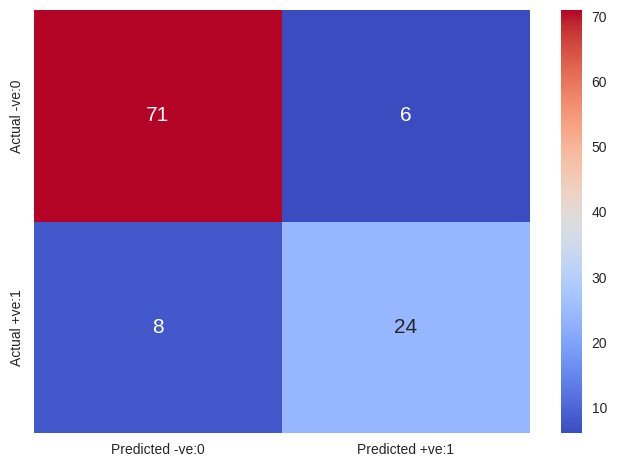

In [ ]:
# Confusion Matrix for 'bestCtree_ada'
cm = confusion_matrix(y_test, pred_ada)
cm_matrix = pd.DataFrame(data=cm, columns=['Predicted -ve:0', 'Predicted +ve:1'],
                                 index=['Actual -ve:0', 'Actual +ve:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='coolwarm')

In [ ]:
# Load XGB classifier in 'xgb_clf' variable
xgb_clf = XGBClassifier()

# Train model on X_train and y_train model
xgb_clf.fit(X_train, y_train, eval_set = [(X_test, y_test)], early_stopping_rounds = 3)

[0]	validation_0-logloss:0.49799
[1]	validation_0-logloss:0.43140
[2]	validation_0-logloss:0.39553
[3]	validation_0-logloss:0.38016
[4]	validation_0-logloss:0.36799
[5]	validation_0-logloss:0.35578
[6]	validation_0-logloss:0.33908
[7]	validation_0-logloss:0.33284
[8]	validation_0-logloss:0.33023
[9]	validation_0-logloss:0.32898
[10]	validation_0-logloss:0.33209
[11]	validation_0-logloss:0.33951
[12]	validation_0-logloss:0.34503


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Predict on X_test data
xgb_pred = xgb_clf.predict(X_test)

# Print accuracy score
print(accuracy_score(y_test, xgb_pred))

0.8073394495412844


In [ ]:
# Try ccp (Cost complexity pruning)
param_grid = {
    "learning_rate":[0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3]
}

gridsearch_XGB = GridSearchCV(XGBClassifier(random_state = 1),
                         param_grid,
                         cv = 5,
                         n_jobs = -1)
gridsearch_XGB.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=1, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.2,
                                           0.3]})

In [ ]:
# Print result
print_results(gridsearch_XGB)

BEST PARAMS: {'learning_rate': 0.1}

0.664 (+/-0.004) for {'learning_rate': 0.001}
0.836 (+/-0.054) for {'learning_rate': 0.005}
0.859 (+/-0.052) for {'learning_rate': 0.01}
0.884 (+/-0.048) for {'learning_rate': 0.05}
0.891 (+/-0.045) for {'learning_rate': 0.1}
0.887 (+/-0.044) for {'learning_rate': 0.2}
0.88 (+/-0.043) for {'learning_rate': 0.3}


In [ ]:
# Modify learning rate and print result
param_grid = {
    "learning_rate": np.arange(0.05, 0.2, 0.01)
}

gridsearch_XGB = GridSearchCV(XGBClassifier(random_state = 1),
                         param_grid,
                         cv = 5,
                         n_jobs = -1)

gridsearch_XGB.fit(X_train, y_train)

print_results(gridsearch_XGB)

BEST PARAMS: {'learning_rate': 0.060000000000000005}

0.884 (+/-0.048) for {'learning_rate': 0.05}
0.896 (+/-0.046) for {'learning_rate': 0.060000000000000005}
0.896 (+/-0.032) for {'learning_rate': 0.07}
0.889 (+/-0.051) for {'learning_rate': 0.08000000000000002}
0.891 (+/-0.059) for {'learning_rate': 0.09000000000000001}
0.891 (+/-0.045) for {'learning_rate': 0.1}
0.891 (+/-0.052) for {'learning_rate': 0.11000000000000001}
0.894 (+/-0.051) for {'learning_rate': 0.12000000000000001}
0.887 (+/-0.044) for {'learning_rate': 0.13}
0.891 (+/-0.045) for {'learning_rate': 0.14}
0.877 (+/-0.043) for {'learning_rate': 0.15000000000000002}
0.884 (+/-0.042) for {'learning_rate': 0.16000000000000003}
0.882 (+/-0.051) for {'learning_rate': 0.17000000000000004}
0.891 (+/-0.04) for {'learning_rate': 0.18000000000000005}
0.887 (+/-0.047) for {'learning_rate': 0.19}
0.887 (+/-0.044) for {'learning_rate': 0.2}


In [ ]:
print('CCP Score:', gridsearch_XGB.best_score_)
print('CCP Parameters:', gridsearch_XGB.best_params_)

CCP Score: 0.8959101844426623
CCP Parameters: {'learning_rate': 0.060000000000000005}


In [ ]:
# Take the best estimator and store in 'bestCtree_XGB' variable
bestCtree_XGB = gridsearch_XGB.best_estimator_

# Predict on X_test data
pred_XGB = bestCtree_XGB.predict(X_test)

# Print accuracy score
print(accuracy_score(y_test, pred_XGB))

0.8165137614678899


<Axes: >

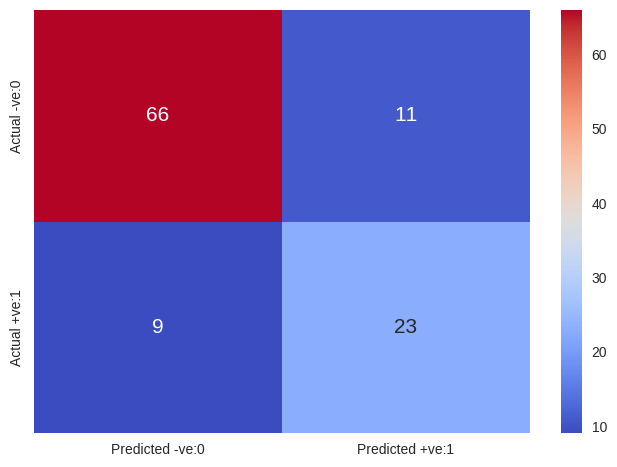

In [ ]:
# Confusion Matrix for 'bestCtree_XGB'
cm = confusion_matrix(y_test, pred_XGB)
cm_matrix = pd.DataFrame(data=cm, columns=['Predicted -ve:0', 'Predicted +ve:1'],
                                 index=['Actual -ve:0', 'Actual +ve:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='coolwarm')

In [ ]:
for mdl in [lr_model, ctree, fulltree, bestCtree, voting_clf, pst_clf, bag_clf,
            rnd_clf, ext_clf, ada_clf, bestCtree_ada, xgb_clf, bestCtree_XGB, knn_model, nb_model, lda_model, qda_model, nn_model, gp_model]:
    y_pred = mdl.predict(X_test)
    accuracy = round(accuracy_score(y_test, y_pred), 3)
    precision = round(precision_score(y_test, y_pred), 3)
    recall = round(recall_score(y_test, y_pred), 3)
    print('mdl: {} / # -- A: {} / P: {} / R: {}'.format(mdl.__class__.__name__,  accuracy,
                                                                         precision,
                                                                         recall))

mdl: LogisticRegression / # -- A: 0.853 / P: 0.786 / R: 0.688
mdl: DecisionTreeClassifier / # -- A: 0.835 / P: 0.719 / R: 0.719
mdl: DecisionTreeClassifier / # -- A: 0.789 / P: 0.636 / R: 0.656
mdl: DecisionTreeClassifier / # -- A: 0.826 / P: 0.686 / R: 0.75
mdl: VotingClassifier / # -- A: 0.862 / P: 0.774 / R: 0.75
mdl: BaggingClassifier / # -- A: 0.872 / P: 0.8 / R: 0.75
mdl: BaggingClassifier / # -- A: 0.862 / P: 0.774 / R: 0.75
mdl: RandomForestClassifier / # -- A: 0.872 / P: 0.8 / R: 0.75
mdl: ExtraTreesClassifier / # -- A: 0.89 / P: 0.857 / R: 0.75
mdl: AdaBoostClassifier / # -- A: 0.872 / P: 0.8 / R: 0.75
mdl: AdaBoostClassifier / # -- A: 0.872 / P: 0.8 / R: 0.75
mdl: XGBClassifier / # -- A: 0.807 / P: 0.667 / R: 0.688
mdl: XGBClassifier / # -- A: 0.817 / P: 0.676 / R: 0.719
mdl: KNeighborsClassifier / # -- A: 0.284 / P: 0.287 / R: 0.969
mdl: GaussianNB / # -- A: 0.798 / P: 0.614 / R: 0.844
mdl: LinearDiscriminantAnalysis / # -- A: 0.881 / P: 0.88 / R: 0.688
mdl: QuadraticDiscri

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [ ]:
# Load Best model in 'final_model' variable
final_model = ExtraTreesClassifier(
    n_estimators = 600,
    max_depth = 20,
    n_jobs = -1,
    random_state = 0
)
final_model.fit(X, y)

final_model.score(X, y)

0.9981515711645101

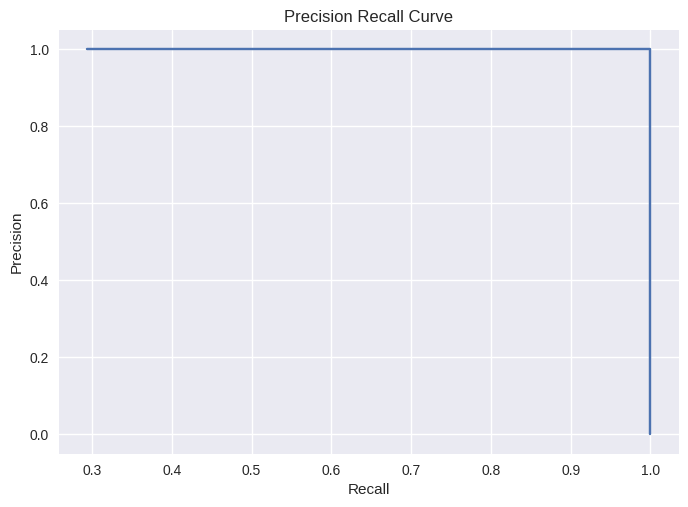

In [ ]:
# Generate precision recall curve
prediction_prob = final_model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, prediction_prob)

# Plot Precision Recall curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

AUC -  1.0


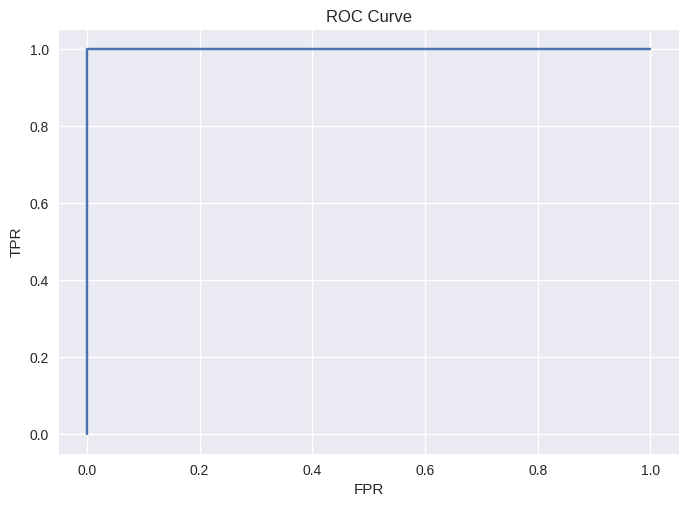

In [ ]:
# Generate ROC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, prediction_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

print("AUC - ",format(roc_auc))
# Plot Precision Recall curve
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

In [ ]:
import joblib
joblib.dump(final_model, 'Best_model.pkl')

['Best_model.pkl']

In [ ]:
loaded_model = joblib.load('/content/Best_model.pkl')

# ULTRASOUND IMAGES

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.layers import Input, Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [3]:
tf.keras.utils.set_random_seed(12)

batch_size = 32
img_height = img_width =224

In [4]:
directory = "/content/drive/MyDrive/Capstone/Ultrasound/train"
test = "/content/drive/MyDrive/Capstone/Ultrasound/test"

In [5]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="binary",
    #class_names=None,
    shuffle=True,
    seed=12,
    validation_split= 0.15,
    subset="training",
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 1924 files belonging to 2 classes.
Using 1636 files for training.


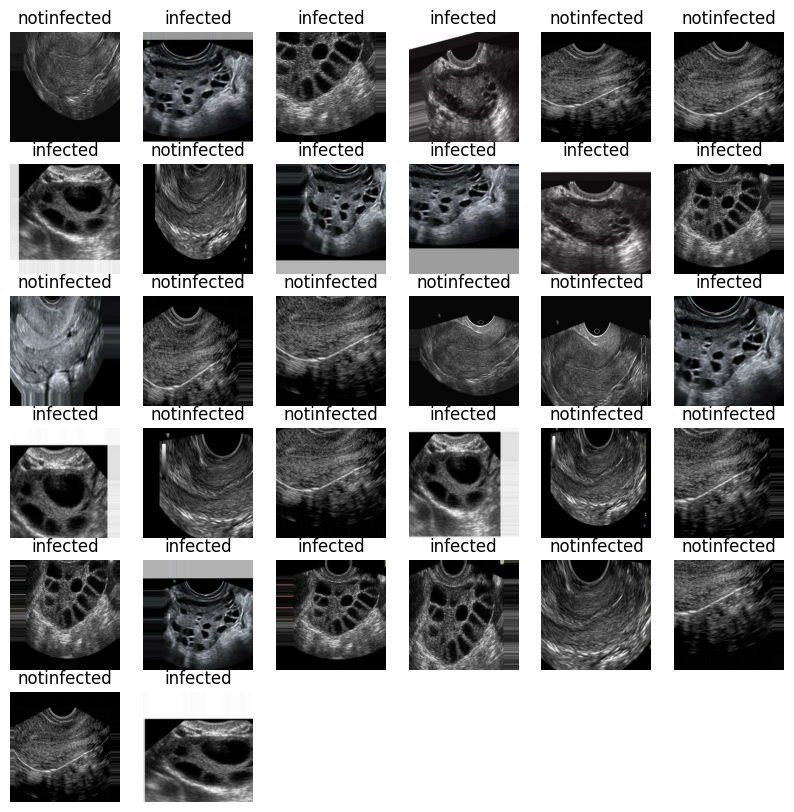

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
class_names = train_ds.class_names
for images, labels in train_ds.take(2):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(labels[i])])
        plt.axis("off")

In [7]:
# data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale = 1./255,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             #width_shift_range=0.2,
                             #height_shift_range=0.2,
                             horizontal_flip = True,
                             vertical_flip=True,
                             rotation_range=20,
                             validation_split=0.2,
                             fill_mode='nearest'
                             )
# prepare an iterators for each dataset
train_ds = datagen.flow_from_directory(directory,
                                       class_mode='categorical',
                                       classes=['infected', 'notinfected'],
                                       target_size=(224, 224),
                                       batch_size=batch_size,
                                       subset='training',
                                       seed=12)
# prepare an iterators for each dataset
val_ds = datagen.flow_from_directory( directory,
                                       class_mode='categorical',
                                       classes=['infected', 'notinfected'],
                                       target_size=(224, 224),
                                       batch_size=batch_size,
                                       subset='validation',
                                       seed=12)

Found 1540 images belonging to 2 classes.
Found 384 images belonging to 2 classes.


In [8]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test,
    seed=12,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 1932 files belonging to 2 classes.


In [9]:
model = Sequential()

model.add(Conv2D(12, (5,5),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.1))

model.add(Conv2D(8, (5,5),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.1))

model.add(Conv2D(4, (5,5),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(2,activation='softmax'))

opt=Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss=BinaryCrossentropy(), metrics=['accuracy'])

In [10]:
earlyStopping = EarlyStopping(monitor="val_loss", mode="min", verbose=1,patience=15)

In [11]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    callbacks=[earlyStopping],
    batch_size=batch_size,
    verbose=1,
    epochs=20)

Epoch 1/20
49/49 [==============================] - 626s 13s/step - loss: 0.4322 - accuracy: 0.7714 - val_loss: 0.1195 - val_accuracy: 0.9557
Epoch 2/20
49/49 [==============================] - 36s 733ms/step - loss: 0.2039 - accuracy: 0.9429 - val_loss: 0.0813 - val_accuracy: 0.9609
Epoch 3/20
49/49 [==============================] - 31s 640ms/step - loss: 0.0370 - accuracy: 0.9890 - val_loss: 0.0229 - val_accuracy: 0.9948
Epoch 4/20
49/49 [==============================] - 31s 637ms/step - loss: 0.0231 - accuracy: 0.9929 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 5/20
49/49 [==============================] - 33s 667ms/step - loss: 0.0084 - accuracy: 0.9987 - val_loss: 0.0127 - val_accuracy: 0.9948
Epoch 6/20
49/49 [==============================] - 31s 644ms/step - loss: 0.0057 - accuracy: 0.9987 - val_loss: 0.0326 - val_accuracy: 0.9948
Epoch 7/20
49/49 [==============================] - 36s 731ms/step - loss: 0.0579 - accuracy: 0.9831 - val_loss: 0.1402 - val_accuracy: 0.9609


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, None, None, 12)    912       
                                                                 
 max_pooling2d (MaxPooling2  (None, None, None, 12)    0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, None, None, 8)     2408      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, None, None, 8)     0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, None, None, 4)     804       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, None, None, 4)     0

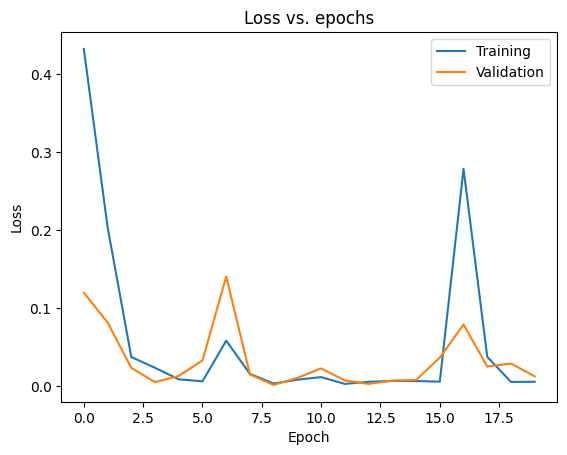

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

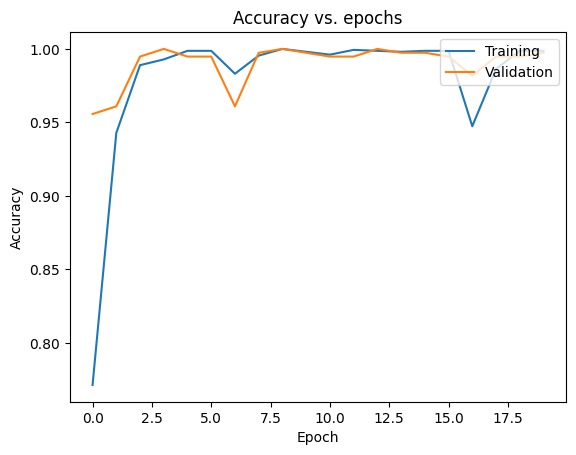

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [15]:
model.evaluate(val_ds)

12/12 [==============================] - 6s 470ms/step - loss: 0.0059 - accuracy: 0.9974


[0.0059404936619102955, 0.9973958134651184]

In [16]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Additionals

In [17]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras import layers

In [18]:
# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

94765736/94765736 [==============================] - 5s 0us/step


In [19]:
# Freeze the layers
for layer in base_model.layers:
    layer.trainable = False

In [20]:
# Build your model on top of the pre-trained ResNet50
model = Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))

In [21]:
# Compile the model
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
# # Data augmentation
# datagen = ImageDataGenerator(
#     rescale=1./255,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     vertical_flip=True,
#     rotation_range=20,
#     validation_split=0.2,
#     fill_mode='nearest'
# )

# Data augmentation with more advanced settings
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

In [23]:
# Train and validation generators
train_generator = datagen.flow_from_directory(
    directory,
    class_mode='categorical',
    classes=['infected', 'notinfected'],
    target_size=(224, 224),
    batch_size=batch_size,
    subset='training',
    seed=12
)

val_generator = datagen.flow_from_directory(
    directory,
    class_mode='categorical',
    classes=['infected', 'notinfected'],
    target_size=(224, 224),
    batch_size=batch_size,
    subset='validation',
    seed=12
)

Found 1540 images belonging to 2 classes.
Found 384 images belonging to 2 classes.


In [24]:
# Training
history = model.fit(
    train_generator,
    validation_data=val_generator,
    callbacks=[earlyStopping],
    batch_size=batch_size,
    epochs=20
)

Epoch 1/20
49/49 [==============================] - 43s 727ms/step - loss: 0.7715 - accuracy: 0.6130 - val_loss: 0.4779 - val_accuracy: 0.9245
Epoch 2/20
49/49 [==============================] - 35s 710ms/step - loss: 0.4472 - accuracy: 0.8208 - val_loss: 0.3616 - val_accuracy: 0.8984
Epoch 3/20
49/49 [==============================] - 34s 697ms/step - loss: 0.3529 - accuracy: 0.8831 - val_loss: 0.3413 - val_accuracy: 0.8464
Epoch 4/20
49/49 [==============================] - 34s 702ms/step - loss: 0.2816 - accuracy: 0.9045 - val_loss: 0.2418 - val_accuracy: 0.9219
Epoch 5/20
49/49 [==============================] - 36s 733ms/step - loss: 0.2559 - accuracy: 0.9136 - val_loss: 0.2482 - val_accuracy: 0.9323
Epoch 6/20
49/49 [==============================] - 37s 753ms/step - loss: 0.2365 - accuracy: 0.9130 - val_loss: 0.2281 - val_accuracy: 0.9062
Epoch 7/20
49/49 [==============================] - 38s 787ms/step - loss: 0.2203 - accuracy: 0.9201 - val_loss: 0.1978 - val_accuracy: 0.9349

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_1 (Dense)             (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 2)                 514       
                                                                 
Total params: 24112770 (91.98 MB)
Trainable params: 525058 (2.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________

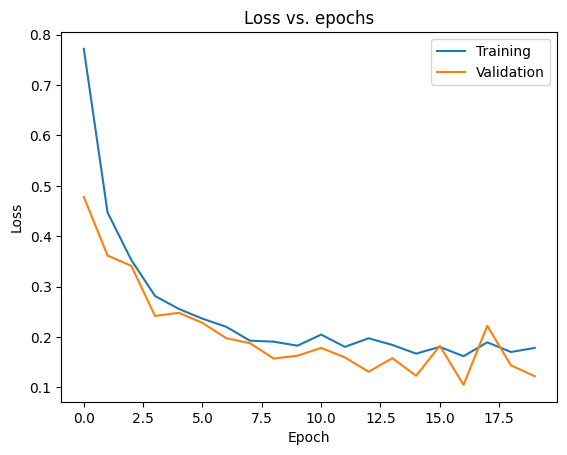

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

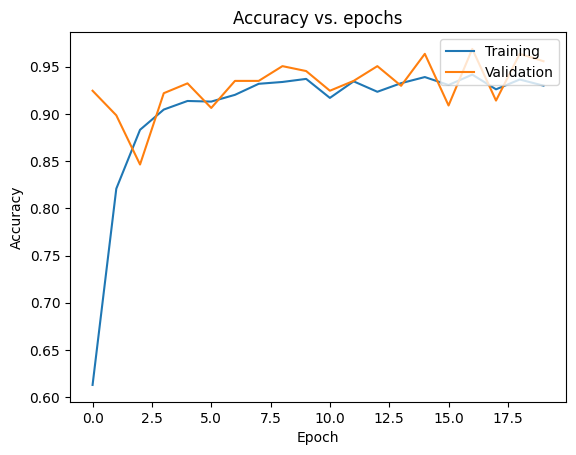

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

# Get true labels and predictions
y_true = val_generator.classes
y_pred = model.predict(val_generator).argmax(axis=1)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=['infected', 'notinfected']))


12/12 [==============================] - 8s 620ms/step
Confusion Matrix:
[[ 58  98]
 [ 81 147]]
Classification Report:
              precision    recall  f1-score   support

    infected       0.42      0.37      0.39       156
 notinfected       0.60      0.64      0.62       228

    accuracy                           0.53       384
   macro avg       0.51      0.51      0.51       384
weighted avg       0.53      0.53      0.53       384



12/12 [==============================] - 6s 501ms/step


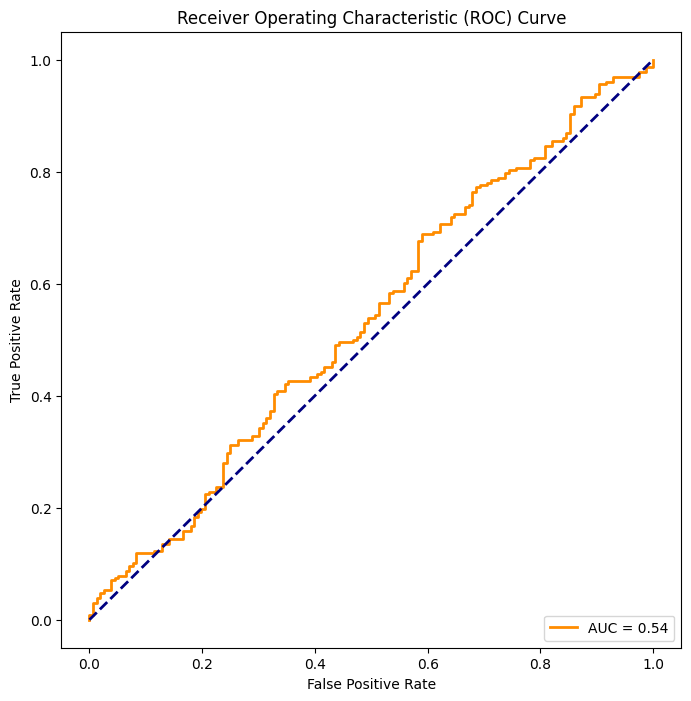

In [29]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for class 1
y_prob = model.predict(val_generator)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [30]:
# Evaluation
model.evaluate(val_generator)

12/12 [==============================] - 7s 588ms/step - loss: 0.1229 - accuracy: 0.9479


[0.12292482703924179, 0.9479166865348816]

In [31]:
model.save('model2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
